# Surface Routes Analysis

In [1]:
%matplotlib inline
# Load Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import modf
from scipy import stats
import os

from time import strftime
from time import time

import warnings
warnings.filterwarnings("ignore")

pathway = os.path.abspath('')
pathway_data = os.path.join(pathway, "Subway_Bus_Streetcar")
pathway_folder = os.path.join(pathway_data, "Clean_Data")
print(f"Pathway to Folder Holding Raw and Processed Data: ${pathway_folder}")

Pathway to Folder Holding Raw and Processed Data: $C:\Users\owner\Documents\TTC_Delays\Jupyter-Notebooks\Subway_Bus_Streetcar\Clean_Data


### Look at subway_master.csv (Subway Data)

In [2]:
subway = pd.read_csv(os.path.join(pathway_folder, "subway_master.csv"))
subway.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),holiday
0,2014-01-03,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34.0,None
1,2014-01-03,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34.0,None
2,2014-01-03,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34.0,None
3,2014-01-03,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34.0,None
4,2014-01-03,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34.0,None


In [3]:
subway.columns

Index(['Date', 'Time', 'Day', 'Station', 'Code', 'Min Delay', 'Min Gap',
       'Bound', 'Line', 'Vehicle', 'Year', 'Description', 'Month', 'nDay',
       'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp', 'Total Rain (mm)',
       'Total Snow (cm)', 'Precipitation', 'Snow on Grnd (cm)',
       'Spd of Max Gust (km/h)', 'holiday'],
      dtype='object')

In [4]:
subway_grouped = subway.groupby('Description').agg({'Description': 'count'}).rename(columns={'Description': 'Number'})
subway_grouped = subway_grouped.reset_index()
subway_grouped.sort_values('Number', ascending = False).head(10)

,Description,Number
56,Miscellaneous Speed Control,17720
66,Operator Overspeeding,12884
70,Passenger Assistance Alarm Activated - No Trou...,7307
44,Injured or ill Customer (In Station) - Transpo...,6640
55,Miscellaneous Other,5038
54,Miscellaneous General Delays,4952
21,Disorderly Patron,4398
45,Injured or ill Customer (On Train) - Medical A...,3459
46,Injured or ill Customer (On Train) - Transported,2849
67,Operator Violated Signal,2584


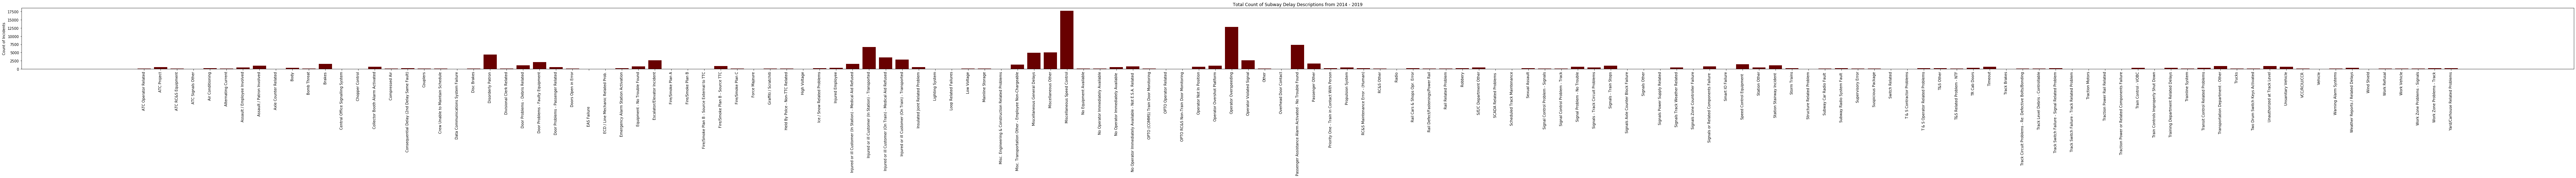

In [5]:
x = subway_grouped['Description']
y = subway_grouped['Number']

fig, ax = plt.subplots(1, figsize = [100, 7])

ax.bar(x, height = y, color='#680000')
ax.set_ylabel("Count of Incidents")
ax.set_title('Total Count of Subway Delay Descriptions from 2014 - 2019')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", "Subway_Delay_Description.jpg"))
plt.show()

### Look at surface_master.csv (Surface Data - Buses)

In [6]:
surface = pd.read_csv(os.path.join(pathway_folder, "surface_master.csv"))
surface.head()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),Holiday
0,2019-01-03,39,0.22,Tuesday,NECR,Mechanical,9.0,18.0,W/B,1794.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None
1,2019-01-03,111,0.25,Tuesday,Eglington,Mechanical,15.0,30.0,S/B,8065.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None
2,2019-01-03,35,0.30,Tuesday,Finch,Mechanical,9.0,18.0,S/B,3275.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None
3,2019-01-03,25,0.50,Tuesday,Don Mills Rd/Eglinton Ave E,Mechanical,9.0,18.0,N/B,8840.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None
4,2019-01-03,36,0.67,Tuesday,Humberwood,Investigation,9.0,18.0,E/B,9119.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None


In [7]:
surface.columns

Index(['Date', 'Route', 'Time', 'Day', 'Location', 'Incident', 'Min Delay',
       'Min Gap', 'Direction', 'Vehicle', 'Year', 'Type', 'Month', 'nDay',
       'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp', 'Total Rain (mm)',
       'Total Snow (cm)', 'Precipitation', 'Snow on Grnd (cm)',
       'Spd of Max Gust (km/h)', 'Holiday'],
      dtype='object')

In [8]:
surface_bus = surface.loc[surface['Type'] == "Bus"]
surface_bus.head()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),Holiday
0,2019-01-03,39,0.22,Tuesday,NECR,Mechanical,9.0,18.0,W/B,1794.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None
1,2019-01-03,111,0.25,Tuesday,Eglington,Mechanical,15.0,30.0,S/B,8065.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None
2,2019-01-03,35,0.30,Tuesday,Finch,Mechanical,9.0,18.0,S/B,3275.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None
3,2019-01-03,25,0.50,Tuesday,Don Mills Rd/Eglinton Ave E,Mechanical,9.0,18.0,N/B,8840.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None
4,2019-01-03,36,0.67,Tuesday,Humberwood,Investigation,9.0,18.0,E/B,9119.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None


In [9]:
surface_bus_grouped = surface_bus.groupby('Incident').agg({'Incident': 'count'}).rename(columns={'Incident': 'Number'})
surface_bus_grouped = surface_bus_grouped.reset_index()
surface_bus_grouped.sort_values('Number', ascending = False).head(10)

,Incident,Number
5,Mechanical,156226
6,Utilized Off Route,67926
4,Late Leaving Garage,65051
2,General Delay,56905
3,Investigation,37871
0,Diversion,10614
1,Emergency Services,7987
7,Vision,61


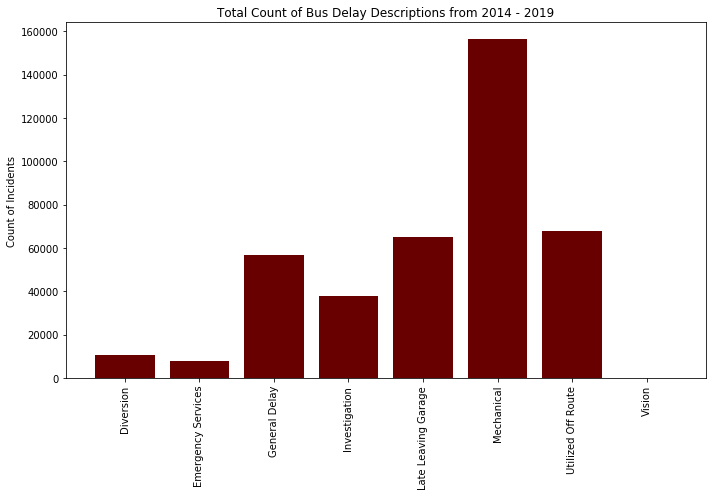

In [10]:
x = surface_bus_grouped['Incident']
y = surface_bus_grouped['Number']

fig, ax = plt.subplots(1, figsize = [10, 7])

ax.bar(x, height = y, color='#680000')
ax.set_ylabel("Count of Incidents")
ax.set_title('Total Count of Bus Delay Descriptions from 2014 - 2019')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", "Bus_Delay_Description.jpg"))
plt.show()

### Look at surface_master.csv (Surface Data - Streetcar)

In [11]:
surface = pd.read_csv(os.path.join(pathway_folder, "surface_master.csv"))
surface.head()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),Holiday
0,2019-01-03,39,0.22,Tuesday,NECR,Mechanical,9.0,18.0,W/B,1794.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None
1,2019-01-03,111,0.25,Tuesday,Eglington,Mechanical,15.0,30.0,S/B,8065.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None
2,2019-01-03,35,0.30,Tuesday,Finch,Mechanical,9.0,18.0,S/B,3275.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None
3,2019-01-03,25,0.50,Tuesday,Don Mills Rd/Eglinton Ave E,Mechanical,9.0,18.0,N/B,8840.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None
4,2019-01-03,36,0.67,Tuesday,Humberwood,Investigation,9.0,18.0,E/B,9119.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None


In [12]:
surface_streetcar = surface.loc[surface['Type'] == "Streetcar"]
surface_streetcar.head()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),Holiday
403570,2019-01-03,301,1.13,Tuesday,Queen/Braodview,Held By,6.0,13.0,E/B,4193.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None
403571,2019-01-03,511,1.50,Tuesday,Bathurst/College,Investigation,5.0,10.0,N/B,1038.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None
403572,2019-01-03,306,1.67,Tuesday,Dundas West stn.,Mechanical,8.0,16.0,W/B,4146.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None
403573,2019-01-03,505,3.17,Tuesday,Lansdowne and Dundas,Mechanical,6.0,12.0,E/B,8416.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None
403574,2019-01-03,310,3.92,Tuesday,Spadina and Lakshore,Held By,20.0,30.0,N/B,4465.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None


In [13]:
surface_streetcar_grouped = surface_streetcar.groupby('Incident').agg({'Incident': 'count'}).rename(columns={'Incident': 'Number'})
surface_streetcar_grouped = surface_streetcar_grouped.reset_index()
surface_streetcar_grouped.sort_values('Number', ascending = False).head(10)

,Incident,Number
6,Mechanical,34620
4,Investigation,8543
5,Late Leaving Garage,7463
3,Held By,6843
2,General Delay,4891
8,Utilized Off Route,2616
1,Emergency Services,1991
0,Diversion,612
7,Overhead - Pantograph,108


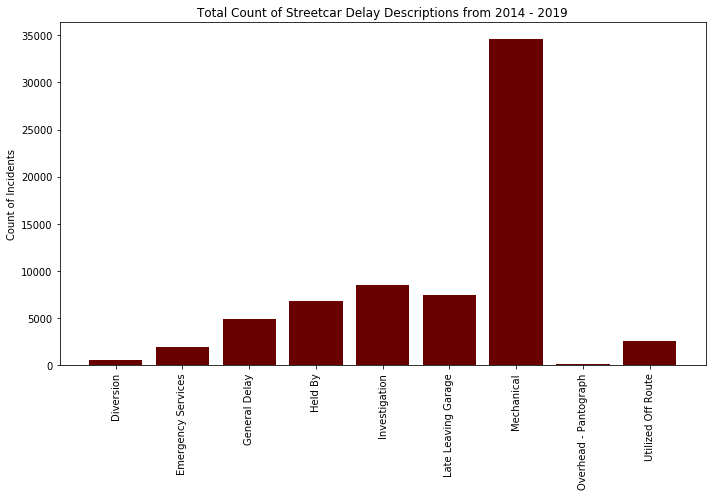

In [14]:
x = surface_streetcar_grouped['Incident']
y = surface_streetcar_grouped['Number']

fig, ax = plt.subplots(1, figsize = [10, 7])

ax.bar(x, height = y, color='#680000')
ax.set_ylabel("Count of Incidents")
ax.set_title('Total Count of Streetcar Delay Descriptions from 2014 - 2019')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", "Streetcar_Delay_Description.jpg"))
plt.show()

<center><h2>Subway Delay Descriptives</h2></center>

In [15]:
groupedbyday = subway.groupby(['Date', 'Day']).agg({'Min Delay': 'sum'}).reset_index()

totaldays = len(groupedbyday)
totalmin = groupedbyday['Min Delay'].sum()
meanminperday = round(groupedbyday['Min Delay'].mean(), 2)
medianperday = round(groupedbyday['Min Delay'].median(), 2)
daysdelay = round((groupedbyday['Min Delay'].sum()/60)/24, 2)
percdelay = round(daysdelay / totaldays, 2)
sigmaday = round(groupedbyday['Min Delay'].std(), 2)
delayvariance = round(sigmaday ** 2, 2)

delaystats_dict = {
    'Total Days': totaldays,
    'Total Minutes': totalmin,
    'Days Delayed': daysdelay,
    'Mean Min. per Day': meanminperday,
    'Median Min. per Day': medianperday,
    '% of Days Delayed': percdelay,
    'Daily Sigma': sigmaday,
    'Delay Variance': delayvariance
}

delaystats = pd.DataFrame(delaystats_dict, index=['Stats'])
delaystats_export = pd.DataFrame(delaystats_dict, index=['Stats'])

delaystats = delaystats.style.format({
    '% of Days Delayed': '{:.2%}'.format
})

delaystats_export.to_csv(os.path.join(pathway, "Data_Analysis", 'Subway_Delay_Stats.csv'))
delaystats_export

,Total Days,Total Minutes,Days Delayed,Mean Min. per Day,Median Min. per Day,% of Days Delayed,Daily Sigma,Delay Variance
Stats,1946,216403,150.28,111.2,97.0,0.08,74.96,5619.0


<center><h2>Bus Delay Descriptives</h2></center>

In [16]:
groupedbyday = surface_bus.groupby(['Date', 'Day']).agg({'Min Delay': 'sum'}).reset_index()

totaldays = len(groupedbyday)
totalmin = groupedbyday['Min Delay'].sum()
meanminperday = round(groupedbyday['Min Delay'].mean(), 2)
medianperday = round(groupedbyday['Min Delay'].median(), 2)
daysdelay = round((groupedbyday['Min Delay'].sum()/60)/24, 2)
percdelay = round(daysdelay / totaldays, 2)
sigmaday = round(groupedbyday['Min Delay'].std(), 2)
delayvariance = round(sigmaday ** 2, 2)

delaystats_dict = {
    'Total Days': totaldays,
    'Total Minutes': totalmin,
    'Days Delayed': daysdelay,
    'Mean Min. per Day': meanminperday,
    'Median Min. per Day': medianperday,
    '% of Days Delayed': percdelay,
    'Daily Sigma': sigmaday,
    'Delay Variance': delayvariance
}

delaystats = pd.DataFrame(delaystats_dict, index=['Stats'])
delaystats_export = pd.DataFrame(delaystats_dict, index=['Stats'])

delaystats = delaystats.style.format({
    '% of Days Delayed': '{:.2%}'.format
})

delaystats_export.to_csv(os.path.join(pathway, "Data_Analysis", 'Bus_Delay_Stats.csv'))
delaystats_export

,Total Days,Total Minutes,Days Delayed,Mean Min. per Day,Median Min. per Day,% of Days Delayed,Daily Sigma,Delay Variance
Stats,1977,4458364.0,3096.09,2255.12,2182.0,1.57,775.51,601415.76


<center><h2>Streetcar Delay Descriptives</h2></center>

In [17]:
groupedbyday = surface_streetcar.groupby(['Date', 'Day']).agg({'Min Delay': 'sum'}).reset_index()

totaldays = len(groupedbyday)
totalmin = groupedbyday['Min Delay'].sum()
meanminperday = round(groupedbyday['Min Delay'].mean(), 2)
medianperday = round(groupedbyday['Min Delay'].median(), 2)
daysdelay = round((groupedbyday['Min Delay'].sum()/60)/24, 2)
percdelay = round(daysdelay / totaldays, 2)
sigmaday = round(groupedbyday['Min Delay'].std(), 2)
delayvariance = round(sigmaday ** 2, 2)

delaystats_dict = {
    'Total Days': totaldays,
    'Total Minutes': totalmin,
    'Days Delayed': daysdelay,
    'Mean Min. per Day': meanminperday,
    'Median Min. per Day': medianperday,
    '% of Days Delayed': percdelay,
    'Daily Sigma': sigmaday,
    'Delay Variance': delayvariance
}

delaystats = pd.DataFrame(delaystats_dict, index=['Stats'])
delaystats_export = pd.DataFrame(delaystats_dict, index=['Stats'])

delaystats = delaystats.style.format({
    '% of Days Delayed': '{:.2%}'.format
})

delaystats_export.to_csv(os.path.join(pathway, "Data_Analysis", 'Streetcar_Delay_Stats.csv'))
delaystats_export

,Total Days,Total Minutes,Days Delayed,Mean Min. per Day,Median Min. per Day,% of Days Delayed,Daily Sigma,Delay Variance
Stats,1943,551412.0,382.92,283.79,265.0,0.2,118.19,13968.88


<center><h2>Latitude and Longitude Mapping of Delay Events - Subway</center></h2>

In [18]:
locations = pd.read_csv(os.path.join(pathway_data, "Data", 'subway_location.csv'))
locations.head()

,Unnamed: 0,Unnamed: 0.1,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Year,Description,subway_latitude,subway_longitude
0,0,0,2014-01-03,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,2014,Priority One - Train in Contact With Person,43.694321,-79.290319
1,1,1,2014-01-03,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,2014,Disorderly Patron,43.654594,-79.465530
2,2,2,2014-01-03,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0,2014,NaN,43.761674,-79.410987
3,3,3,2014-01-03,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,2014,Disorderly Patron,43.659143,-79.442970
4,4,4,2014-01-03,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,2014,Unsanitary Vehicle,43.670672,-79.385950


In [19]:
geo = locations.groupby('Station').agg({
    'subway_latitude': 'mean', 
    'subway_longitude': 'mean',
    'Code': 'count'
})

geo = geo.rename(columns={'Min Delay': 'Min Mean'})

geo = geo[geo['subway_latitude'] > 0].reset_index()

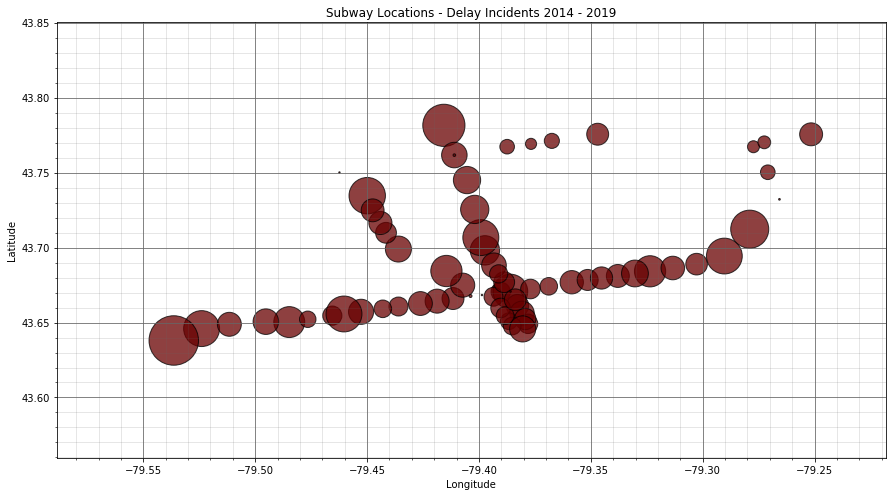

In [20]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    geo['subway_longitude'], 
    geo['subway_latitude'], 
    c = '#680000', 
    s = geo['Code']/2,
    alpha = 0.75,
    edgecolor = 'black'
)

ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Subway Locations - Delay Incidents 2014 - 2019')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Subway_Locations_Delay_2014_2019.jpg'))
plt.show()

<center><h2>Weather and the Subway</center></h2>

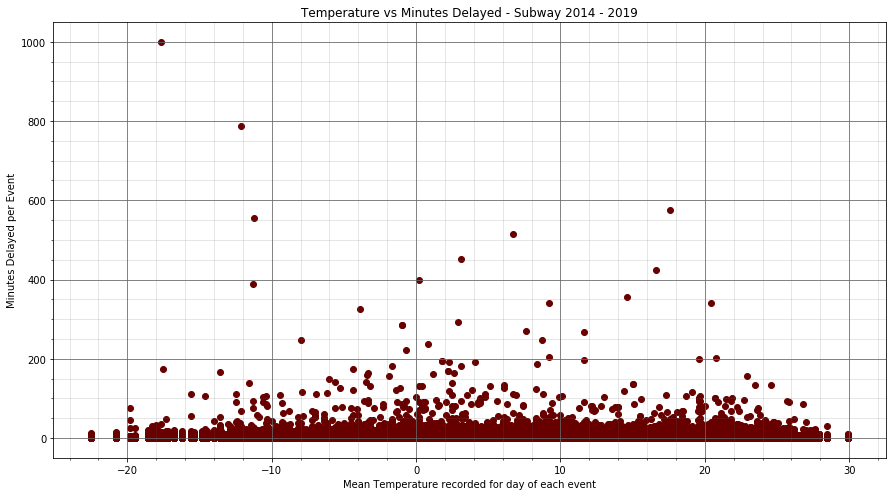

In [21]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    subway['Mean Temp'], 
    subway['Min Delay'], 
    color = '#680000'
)

ax.set_ylabel('Minutes Delayed per Event')
ax.set_xlabel('Mean Temperature recorded for day of each event')
ax.set_title('Temperature vs Minutes Delayed - Subway 2014 - 2019')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Temp_vs_Min_Delay_Subway.jpg'))
plt.show()

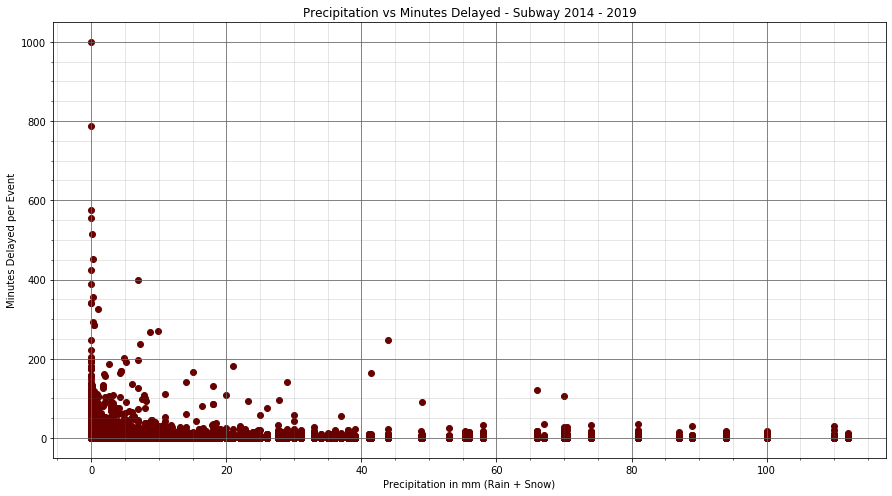

In [22]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    subway['Precipitation'], 
    subway['Min Delay'], 
    color = '#680000'
)

ax.set_ylabel('Minutes Delayed per Event')
ax.set_xlabel('Precipitation in mm (Rain + Snow)')
ax.set_title('Precipitation vs Minutes Delayed - Subway 2014 - 2019')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Precip_vs_Min_Delay_Subway.jpg'))
plt.show()

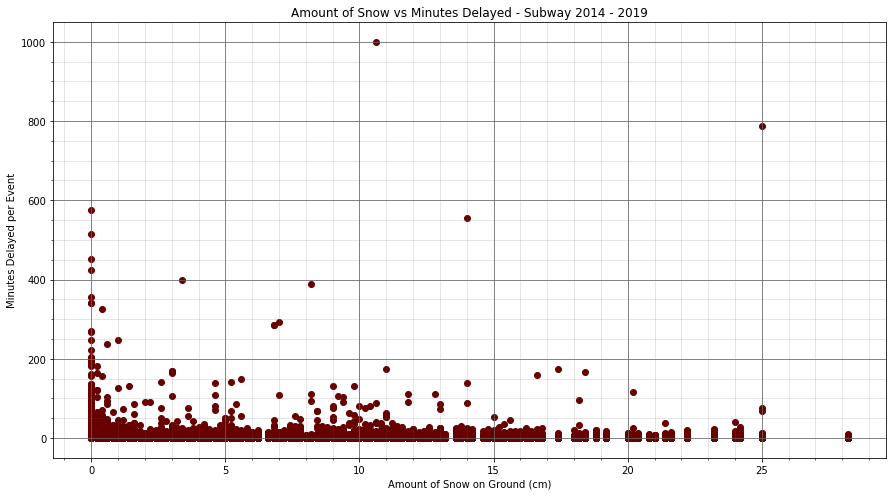

In [23]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    subway['Snow on Grnd (cm)'], 
    subway['Min Delay'], 
    color = '#680000'
)

ax.set_ylabel('Minutes Delayed per Event')
ax.set_xlabel('Amount of Snow on Ground (cm)')
ax.set_title('Amount of Snow vs Minutes Delayed - Subway 2014 - 2019')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Snow_vs_Min_Delay_Subway.jpg'))
plt.show()

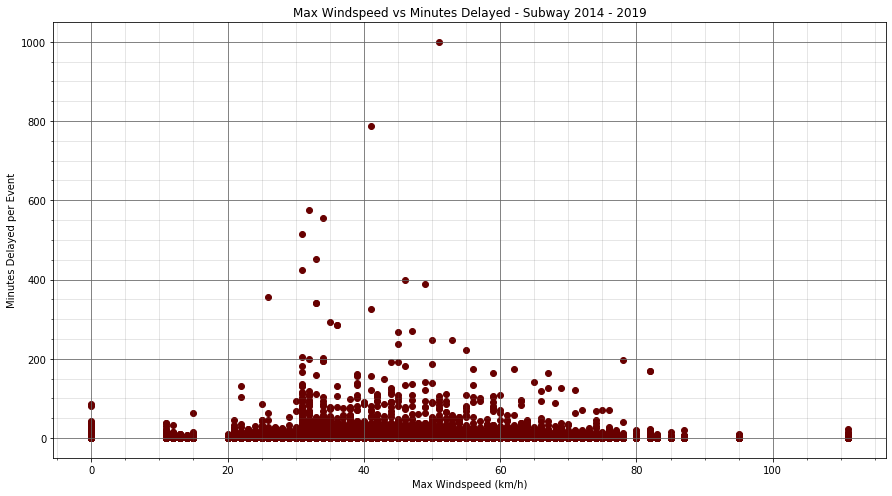

In [24]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    subway['Spd of Max Gust (km/h)'], 
    subway['Min Delay'], 
    color = '#680000'
)

ax.set_ylabel('Minutes Delayed per Event')
ax.set_xlabel('Max Windspeed (km/h)')
ax.set_title('Max Windspeed vs Minutes Delayed - Subway 2014 - 2019')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Wind_vs_Min_Delay_Subway.jpg'))
plt.show()

<center><h2>Weather and the Bus</center></h2>

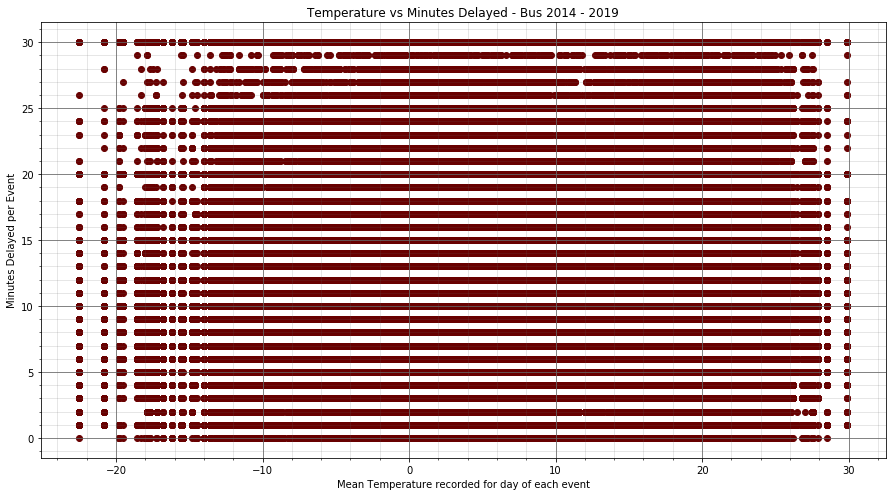

In [25]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    surface_bus['Mean Temp'], 
    surface_bus['Min Delay'], 
    color = '#680000'
)

ax.set_ylabel('Minutes Delayed per Event')
ax.set_xlabel('Mean Temperature recorded for day of each event')
ax.set_title('Temperature vs Minutes Delayed - Bus 2014 - 2019')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Temp_vs_Min_Delay_Bus.jpg'))
plt.show()

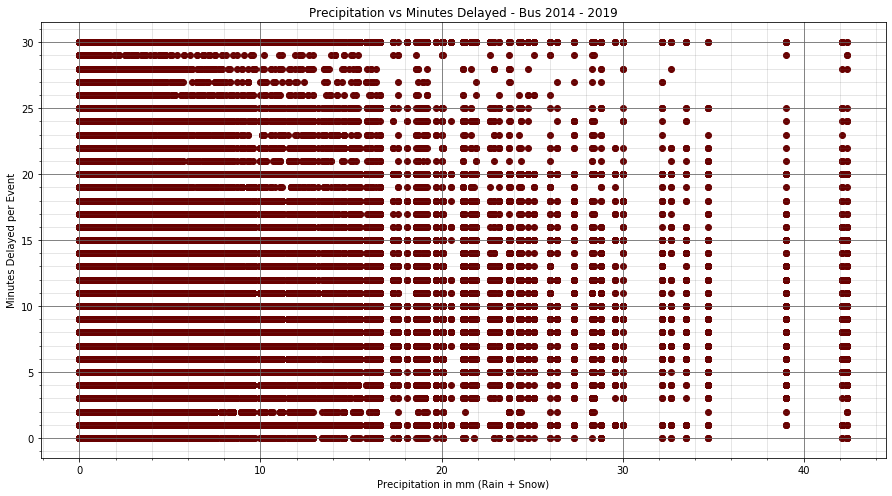

In [26]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    surface_bus['Precipitation'], 
    surface_bus['Min Delay'], 
    color = '#680000'
)

ax.set_ylabel('Minutes Delayed per Event')
ax.set_xlabel('Precipitation in mm (Rain + Snow)')
ax.set_title('Precipitation vs Minutes Delayed - Bus 2014 - 2019')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Precip_vs_Min_Delay_Bus.jpg'))
plt.show()

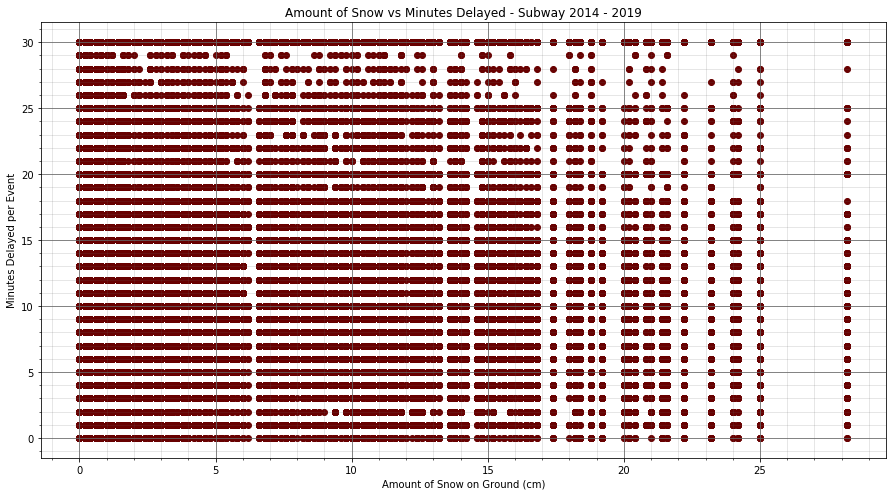

In [27]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    surface_bus['Snow on Grnd (cm)'], 
    surface_bus['Min Delay'], 
    color = '#680000'
)

ax.set_ylabel('Minutes Delayed per Event')
ax.set_xlabel('Amount of Snow on Ground (cm)')
ax.set_title('Amount of Snow vs Minutes Delayed - Subway 2014 - 2019')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Snow_vs_Min_Delay_Bus.jpg'))
plt.show()

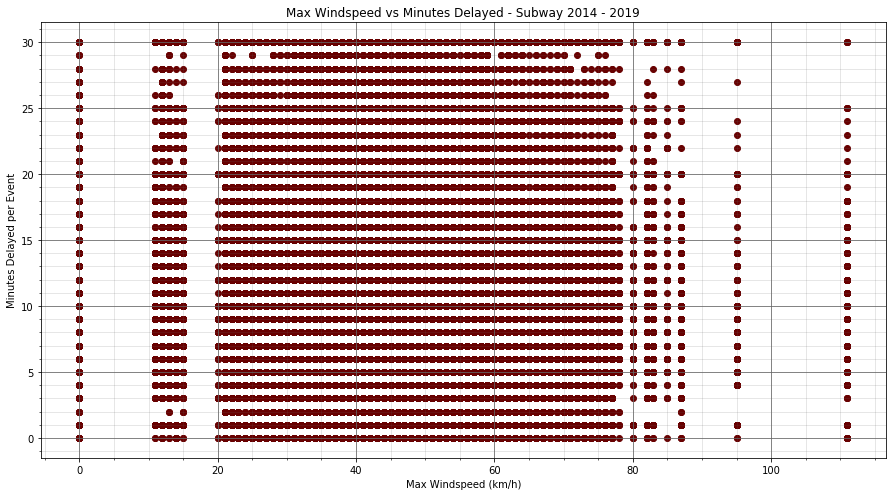

In [28]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    surface_bus['Spd of Max Gust (km/h)'], 
    surface_bus['Min Delay'], 
    color = '#680000'
)

ax.set_ylabel('Minutes Delayed per Event')
ax.set_xlabel('Max Windspeed (km/h)')
ax.set_title('Max Windspeed vs Minutes Delayed - Subway 2014 - 2019')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Wind_vs_Min_Delay_Bus.jpg'))
plt.show()

<center><h2>Weather and the Streetcar</center></h2>

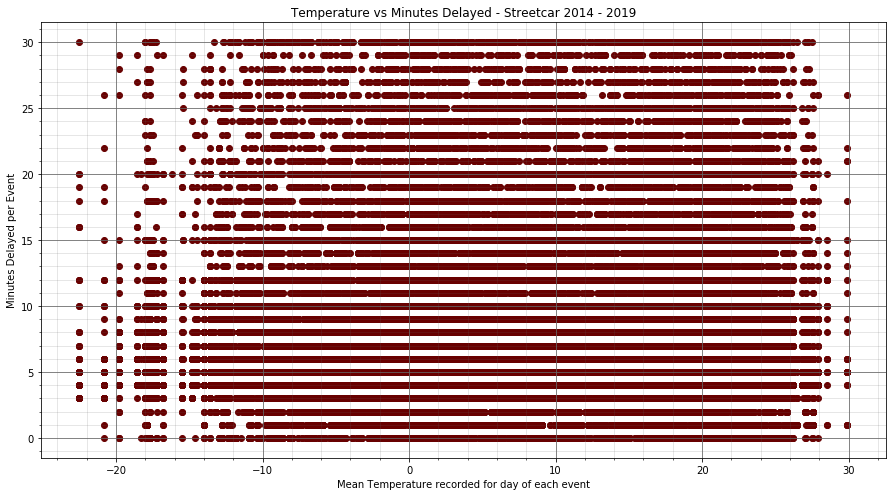

In [29]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    surface_streetcar['Mean Temp'], 
    surface_streetcar['Min Delay'], 
    color = '#680000'
)

ax.set_ylabel('Minutes Delayed per Event')
ax.set_xlabel('Mean Temperature recorded for day of each event')
ax.set_title('Temperature vs Minutes Delayed - Streetcar 2014 - 2019')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Temp_vs_Min_Delay_Streetcar.jpg'))
plt.show()

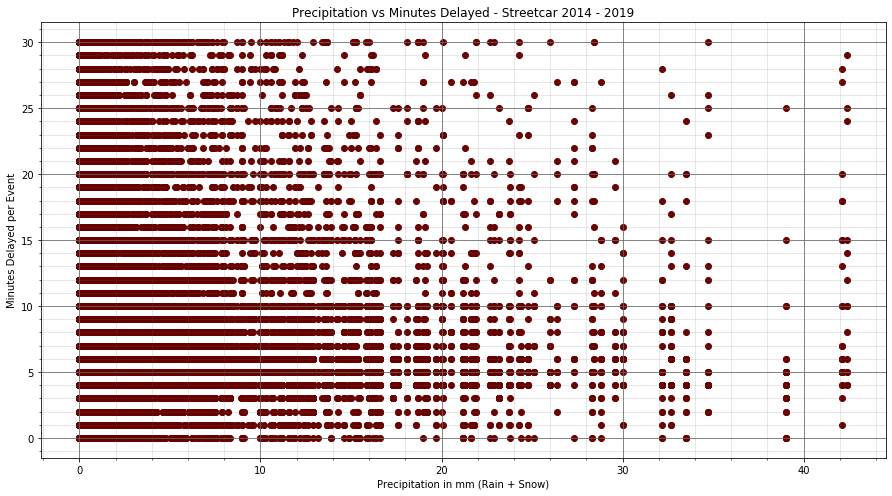

In [30]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    surface_streetcar['Precipitation'], 
    surface_streetcar['Min Delay'], 
    color = '#680000'
)

ax.set_ylabel('Minutes Delayed per Event')
ax.set_xlabel('Precipitation in mm (Rain + Snow)')
ax.set_title('Precipitation vs Minutes Delayed - Streetcar 2014 - 2019')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Precip_vs_Min_Delay_Streetcar.jpg'))
plt.show()

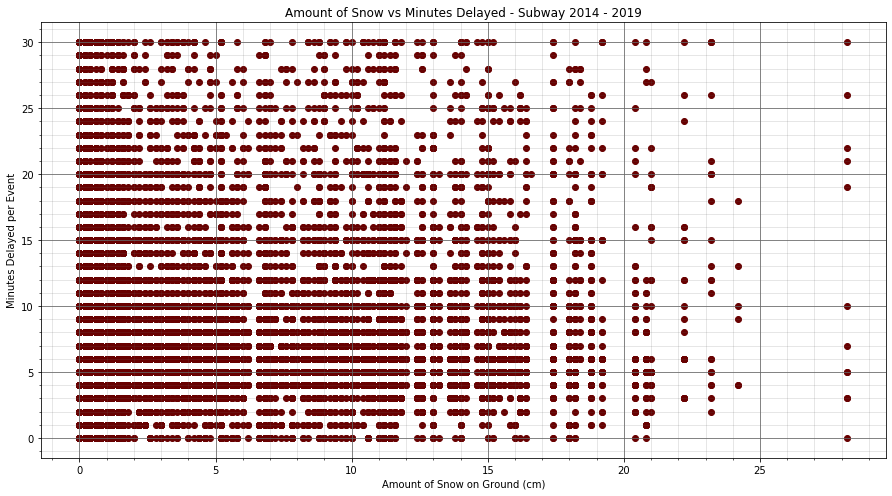

In [31]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    surface_streetcar['Snow on Grnd (cm)'], 
    surface_streetcar['Min Delay'], 
    color = '#680000'
)

ax.set_ylabel('Minutes Delayed per Event')
ax.set_xlabel('Amount of Snow on Ground (cm)')
ax.set_title('Amount of Snow vs Minutes Delayed - Subway 2014 - 2019')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Snow_vs_Min_Delay_Streetcar.jpg'))
plt.show()

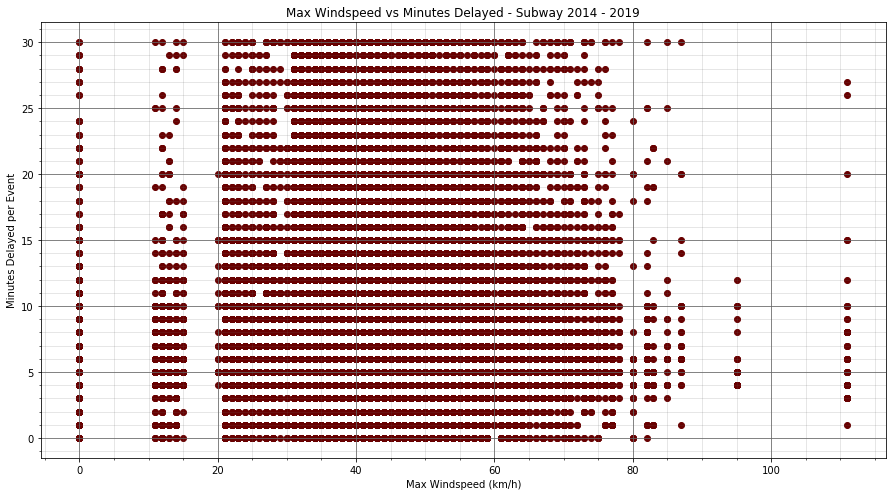

In [32]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    surface_streetcar['Spd of Max Gust (km/h)'], 
    surface_streetcar['Min Delay'], 
    color = '#680000'
)

ax.set_ylabel('Minutes Delayed per Event')
ax.set_xlabel('Max Windspeed (km/h)')
ax.set_title('Max Windspeed vs Minutes Delayed - Subway 2014 - 2019')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Wind_vs_Min_Delay_Streetcar.jpg'))
plt.show()

<center><h2>Visualizing Delays Subway</center></h2>

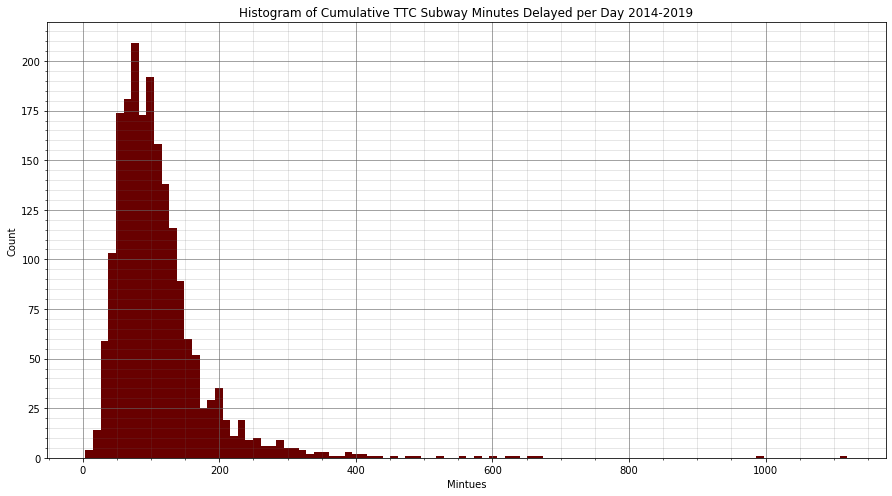

In [33]:
groupedbyday = subway.groupby(['Date', 'Day']).agg({'Min Delay': 'sum'}).reset_index()

fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.hist(
    groupedbyday['Min Delay'], 
    bins = 100, 
    color = '#680000'
)

ax.set_xlabel('Mintues')
ax.set_ylabel('Count')
ax.set_title('Histogram of Cumulative TTC Subway Minutes Delayed per Day 2014-2019')

plt.grid(
    b = True, 
    which = 'major', 
    color = '#666666', 
    linestyle = '-',
    alpha = 0.75
)

plt.minorticks_on()
plt.grid(
    b = True, 
    which = 'minor', 
    color = '#666666', 
    linestyle = '-', 
    alpha = 0.2
)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Histogram_TTC_Subway_Min_Delay.jpg'))
plt.show()

<center><h2>Visualizing Delays Bus</center></h2>

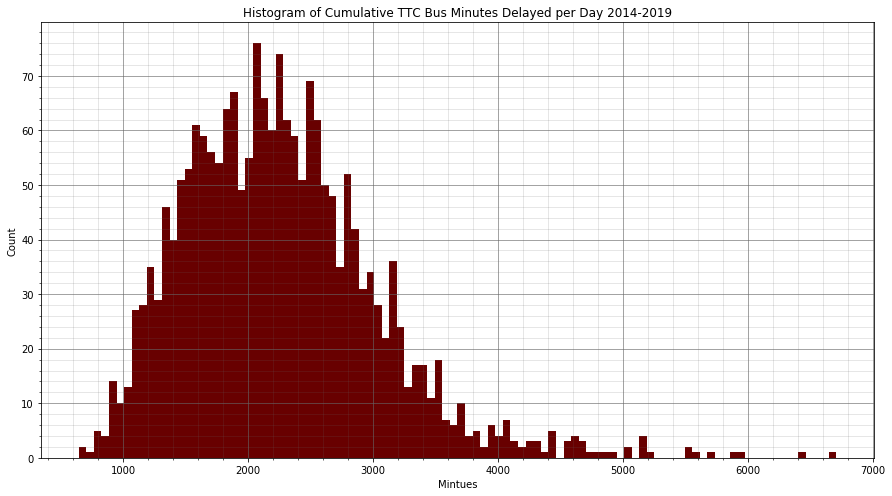

In [34]:
groupedbyday = surface_bus.groupby(['Date', 'Day']).agg({'Min Delay': 'sum'}).reset_index()

fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.hist(
    groupedbyday['Min Delay'], 
    bins = 100, 
    color = '#680000'
)

ax.set_xlabel('Mintues')
ax.set_ylabel('Count')
ax.set_title('Histogram of Cumulative TTC Bus Minutes Delayed per Day 2014-2019')

plt.grid(
    b = True, 
    which = 'major', 
    color = '#666666', 
    linestyle = '-',
    alpha = 0.75
)

plt.minorticks_on()
plt.grid(
    b = True, 
    which = 'minor', 
    color = '#666666', 
    linestyle = '-', 
    alpha = 0.2
)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Histogram_TTC_Bus_Min_Delay.jpg'))
plt.show()

<center><h2>Visualizing Delays Streetcar</center></h2>

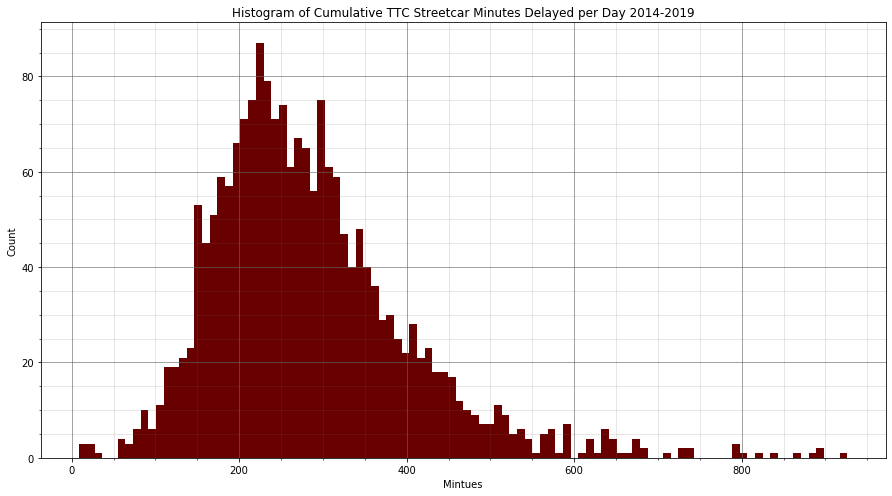

In [35]:
groupedbyday = surface_streetcar.groupby(['Date', 'Day']).agg({'Min Delay': 'sum'}).reset_index()

fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.hist(
    groupedbyday['Min Delay'], 
    bins = 100, 
    color = '#680000'
)

ax.set_xlabel('Mintues')
ax.set_ylabel('Count')
ax.set_title('Histogram of Cumulative TTC Streetcar Minutes Delayed per Day 2014-2019')

plt.grid(
    b = True, 
    which = 'major', 
    color = '#666666', 
    linestyle = '-',
    alpha = 0.75
)

plt.minorticks_on()
plt.grid(
    b = True, 
    which = 'minor', 
    color = '#666666', 
    linestyle = '-', 
    alpha = 0.2
)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Histogram_TTC_Streetcar_Min_Delay.jpg'))
plt.show()

<center><h2>Subway - Days of the Week</center></h2>

In [36]:
weekdays = subway.groupby('Day').agg({
    'Min Delay': 'sum', 
    'Min Gap': 'sum',
    'Code': 'count'
}).rename(
    columns={'Min Delay': 'Sum of Minutes', 'Min Gap': 'Sum of Gap Minutes', 'Code': 'Incident Count'}).reset_index()
weekdays

,Day,Sum of Minutes,Sum of Gap Minutes,Incident Count
0,Friday,33593,49406,17099
1,Monday,32682,47833,16929
2,Saturday,27259,41291,12682
3,Sunday,22299,33808,10807
4,Thursday,32135,47519,17269
5,Tuesday,35236,50004,17154
6,Wednesday,33199,48047,17263


In [37]:
weekdays.head()

,Day,Sum of Minutes,Sum of Gap Minutes,Incident Count
0,Friday,33593,49406,17099
1,Monday,32682,47833,16929
2,Saturday,27259,41291,12682
3,Sunday,22299,33808,10807
4,Thursday,32135,47519,17269


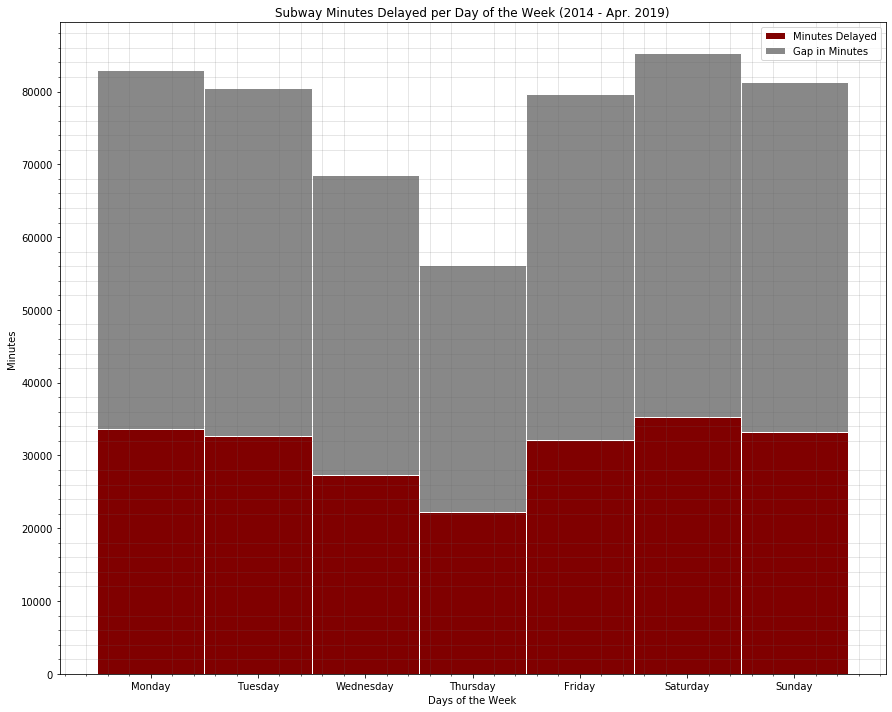

In [38]:
bar1 = weekdays['Sum of Minutes']
bar2 = weekdays['Sum of Gap Minutes']

label = weekdays['Day']
barwidth = 1
names = weekdays['Day'].unique().tolist()
dayorder = [1, 5, 6, 4, 0, 2, 3]
names = [names[i] for i in dayorder]

bars = np.add(bar1, bar2).tolist()

fig, ax = plt.subplots(1, figsize = [12.5, 10])

p1 = ax.bar(label, bar1, color='#800000', edgecolor='white', width=barwidth)
p2 = ax.bar(label, bar2, bottom=bar1, color='#888888', edgecolor='white', width=barwidth)

ax.set_ylabel('Minutes')
ax.set_xlabel('Days of the Week')
ax.set_title('Subway Minutes Delayed per Day of the Week (2014 - Apr. 2019)')

plt.legend((p1[0], p2[0]), ('Minutes Delayed', 'Gap in Minutes'))

plt.xticks(label, names)

plt.minorticks_on()
plt.grid(
    b = True, 
    which = 'minor', 
    color = '#666666', 
    linestyle = '-', 
    alpha = 0.2
)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Subway_Min_Delay_Day_of_Week.jpg'))
plt.show()

<center><h2>Bus - Days of the Week</center></h2>

In [39]:
weekdays = surface_bus.groupby('Day').agg({
    'Min Delay': 'sum', 
    'Min Gap': 'sum',
    'Incident': 'count'
}).rename(
    columns={'Min Delay': 'Sum of Minutes', 'Min Gap': 'Sum of Gap Minutes', 'Incident': 'Incident Count'}).reset_index()
weekdays

,Day,Sum of Minutes,Sum of Gap Minutes,Incident Count
0,Friday,720275.0,1369140.0,66289
1,Monday,656240.0,1261441.0,61324
2,Saturday,477085.0,928009.0,38946
3,Sunday,419301.0,826169.0,32450
4,Thursday,739273.0,1385386.0,68029
5,Tuesday,723731.0,1373480.0,68291
6,Wednesday,722459.0,1362826.0,67312


In [40]:
weekdays.head()

,Day,Sum of Minutes,Sum of Gap Minutes,Incident Count
0,Friday,720275.0,1369140.0,66289
1,Monday,656240.0,1261441.0,61324
2,Saturday,477085.0,928009.0,38946
3,Sunday,419301.0,826169.0,32450
4,Thursday,739273.0,1385386.0,68029


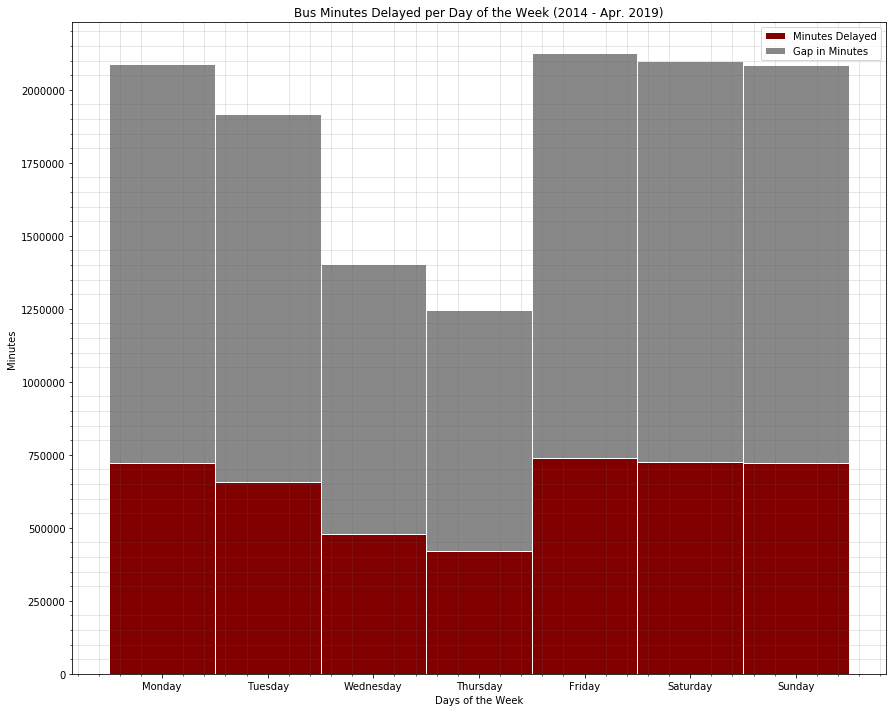

In [41]:
bar1 = weekdays['Sum of Minutes']
bar2 = weekdays['Sum of Gap Minutes']

label = weekdays['Day']
barwidth = 1
names = weekdays['Day'].unique().tolist()
dayorder = [1, 5, 6, 4, 0, 2, 3]
names = [names[i] for i in dayorder]

bars = np.add(bar1, bar2).tolist()

fig, ax = plt.subplots(1, figsize = [12.5, 10])

p1 = ax.bar(label, bar1, color='#800000', edgecolor='white', width=barwidth)
p2 = ax.bar(label, bar2, bottom=bar1, color='#888888', edgecolor='white', width=barwidth)

ax.set_ylabel('Minutes')
ax.set_xlabel('Days of the Week')
ax.set_title('Bus Minutes Delayed per Day of the Week (2014 - Apr. 2019)')

plt.legend((p1[0], p2[0]), ('Minutes Delayed', 'Gap in Minutes'))

plt.xticks(label, names)

plt.minorticks_on()
plt.grid(
    b = True, 
    which = 'minor', 
    color = '#666666', 
    linestyle = '-', 
    alpha = 0.2
)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Bus_Min_Delay_Day_of_Week.jpg'))
plt.show()

<center><h2>Streetcar - Days of the Week</center></h2>

In [42]:
weekdays = surface_streetcar.groupby('Day').agg({
    'Min Delay': 'sum', 
    'Min Gap': 'sum',
    'Incident': 'count'
}).rename(
    columns={'Min Delay': 'Sum of Minutes', 'Min Gap': 'Sum of Gap Minutes', 'Incident': 'Incident Count'}).reset_index()
weekdays

,Day,Sum of Minutes,Sum of Gap Minutes,Incident Count
0,Friday,86098.0,148689.0,10721
1,Monday,77615.0,133703.0,10005
2,Saturday,67984.0,116462.0,7752
3,Sunday,63745.0,111061.0,6842
4,Thursday,87801.0,148390.0,11057
5,Tuesday,83730.0,141815.0,10683
6,Wednesday,84439.0,142069.0,10627


In [43]:
weekdays.head()

,Day,Sum of Minutes,Sum of Gap Minutes,Incident Count
0,Friday,86098.0,148689.0,10721
1,Monday,77615.0,133703.0,10005
2,Saturday,67984.0,116462.0,7752
3,Sunday,63745.0,111061.0,6842
4,Thursday,87801.0,148390.0,11057


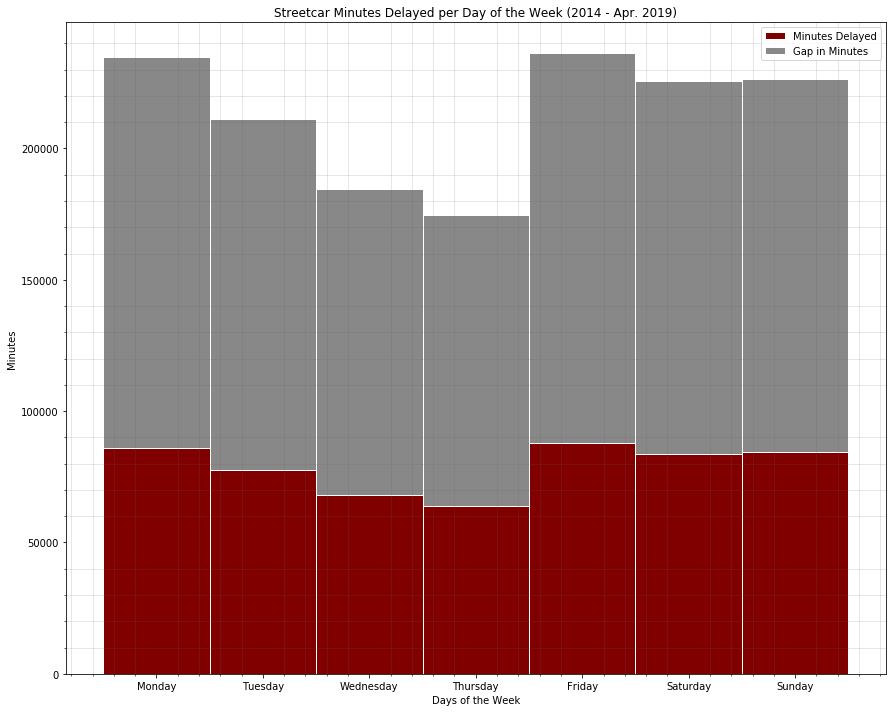

In [44]:
bar1 = weekdays['Sum of Minutes']
bar2 = weekdays['Sum of Gap Minutes']

label = weekdays['Day']
barwidth = 1
names = weekdays['Day'].unique().tolist()
dayorder = [1, 5, 6, 4, 0, 2, 3]
names = [names[i] for i in dayorder]

bars = np.add(bar1, bar2).tolist()

fig, ax = plt.subplots(1, figsize = [12.5, 10])

p1 = ax.bar(label, bar1, color='#800000', edgecolor='white', width=barwidth)
p2 = ax.bar(label, bar2, bottom=bar1, color='#888888', edgecolor='white', width=barwidth)

ax.set_ylabel('Minutes')
ax.set_xlabel('Days of the Week')
ax.set_title('Streetcar Minutes Delayed per Day of the Week (2014 - Apr. 2019)')

plt.legend((p1[0], p2[0]), ('Minutes Delayed', 'Gap in Minutes'))

plt.xticks(label, names)

plt.minorticks_on()
plt.grid(
    b = True, 
    which = 'minor', 
    color = '#666666', 
    linestyle = '-', 
    alpha = 0.2
)

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Streetcar_Min_Delay_Day_of_Week.jpg'))
plt.show()

<center><h2>Subway - Time of Day - Incident Counts</center></h2>

In [45]:
timeofday = subway.groupby(['Day', 'Time']).agg({'Min Delay': 'sum'}).reset_index()
timeofday['Time'] = pd.to_datetime(timeofday['Time'].str.strip(), format='%H:%M')
dailyincidents = subway.groupby(['Day', 'Time']).agg({'Min Delay': 'count'}).reset_index()
dailyincidents = dailyincidents.rename(columns={'Min Delay': 'Counts'})
timeofday['Counts'] = dailyincidents['Counts']
timeofday['Time'] = timeofday['Time'].dt.hour
timeofday = timeofday.groupby(['Day', 'Time']).agg({'Min Delay': 'sum', 'Counts': 'sum'}).reset_index().reset_index()
timeofday = timeofday.rename(columns={'index': 'Chronological'})

In [46]:
timeofday.head(10)

,Chronological,Day,Time,Min Delay,Counts
0,0,Friday,0,1552,503
1,1,Friday,1,1008,447
2,2,Friday,2,75,157
3,3,Friday,3,25,50
4,4,Friday,4,5,60
5,5,Friday,5,1054,497
6,6,Friday,6,1813,1138
7,7,Friday,7,1690,948
8,8,Friday,8,1703,1049
9,9,Friday,9,1467,857


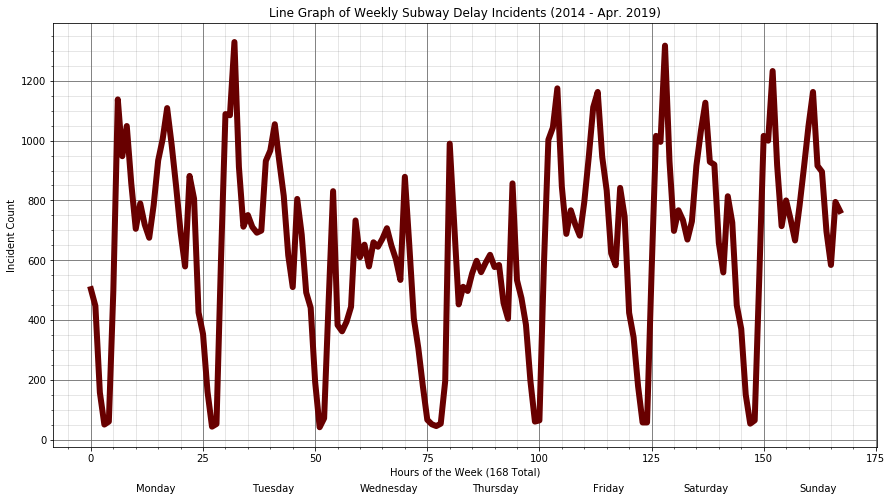

In [47]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.plot(
    timeofday['Chronological'], 
    timeofday['Counts'], 
    color = '#680000', 
    lw = 6
)

ax.set_ylabel('Incident Count')
ax.set_xlabel('Hours of the Week (168 Total)')
ax.set_title('Line Graph of Weekly Subway Delay Incidents (2014 - Apr. 2019)')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.text(10, -175, 'Monday')
plt.text(36, -175, 'Tuesday')
plt.text(60, -175, 'Wednesday')
plt.text(85, -175, 'Thursday')
plt.text(112, -175, 'Friday')
plt.text(132, -175, 'Saturday')
plt.text(158, -175, 'Sunday')

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Subway_Line_Graph_Weekly_Subway_Delay.jpg'))
plt.show()

<center><h2>Bus - Time of Day - Incident Counts</center></h2>

In [48]:
timeofday = surface_bus.groupby(['Day', 'Time']).agg({'Min Delay': 'sum'}).reset_index()
dailyincidents = surface_bus.groupby(['Day', 'Time']).agg({'Min Delay': 'count'}).reset_index()
dailyincidents = dailyincidents.rename(columns={'Min Delay': 'Counts'})
timeofday['Counts'] = dailyincidents['Counts']
timeofday = timeofday.astype({"Time": int})
timeofday = timeofday.groupby(['Day', 'Time']).agg({'Min Delay': 'sum', 'Counts': 'sum'}).reset_index().reset_index()
timeofday = timeofday.rename(columns={'index': 'Chronological'})

In [49]:
timeofday.head(10)

,Chronological,Day,Time,Min Delay,Counts
0,0,Friday,0,10210.0,719
1,1,Friday,1,6816.0,530
2,2,Friday,2,4877.0,356
3,3,Friday,3,4445.0,290
4,4,Friday,4,9057.0,657
5,5,Friday,5,45753.0,4505
6,6,Friday,6,74593.0,7986
7,7,Friday,7,41512.0,4577
8,8,Friday,8,32844.0,3314
9,9,Friday,9,20943.0,2157


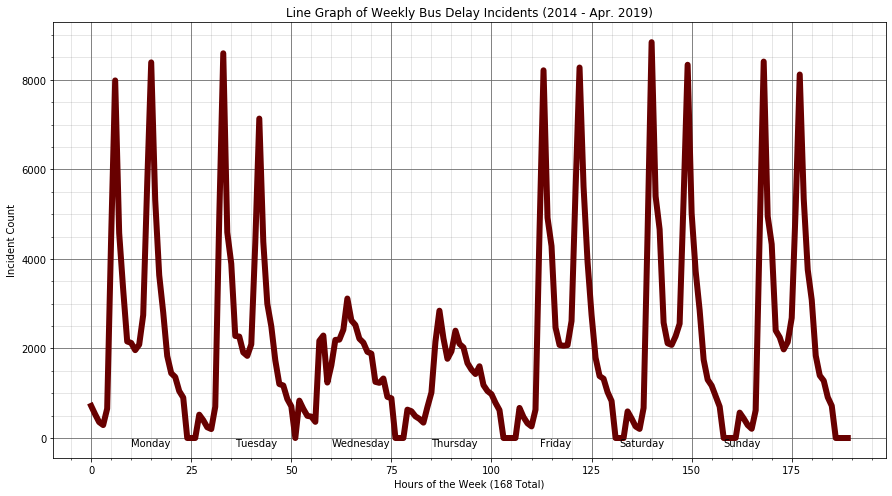

In [50]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.plot(
    timeofday['Chronological'], 
    timeofday['Counts'], 
    color = '#680000', 
    lw = 6
)

ax.set_ylabel('Incident Count')
ax.set_xlabel('Hours of the Week (168 Total)')
ax.set_title('Line Graph of Weekly Bus Delay Incidents (2014 - Apr. 2019)')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.text(10, -175, 'Monday')
plt.text(36, -175, 'Tuesday')
plt.text(60, -175, 'Wednesday')
plt.text(85, -175, 'Thursday')
plt.text(112, -175, 'Friday')
plt.text(132, -175, 'Saturday')
plt.text(158, -175, 'Sunday')

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Bus_Line_Graph_Weekly_Subway_Delay.jpg'))
plt.show()

<center><h2>Streetcar - Time of Day - Incident Counts</center></h2>

In [51]:
timeofday = surface_streetcar.groupby(['Day', 'Time']).agg({'Min Delay': 'sum'}).reset_index()
dailyincidents = surface_bus.groupby(['Day', 'Time']).agg({'Min Delay': 'count'}).reset_index()
dailyincidents = dailyincidents.rename(columns={'Min Delay': 'Counts'})
timeofday['Counts'] = dailyincidents['Counts']
timeofday = timeofday.astype({"Time": int})
timeofday = timeofday.groupby(['Day', 'Time']).agg({'Min Delay': 'sum', 'Counts': 'sum'}).reset_index().reset_index()
timeofday = timeofday.rename(columns={'index': 'Chronological'})

In [52]:
timeofday.head(10)

,Chronological,Day,Time,Min Delay,Counts
0,0,Friday,0,1798.0,695
1,1,Friday,1,1411.0,493
2,2,Friday,2,1031.0,241
3,3,Friday,3,806.0,224
4,4,Friday,4,1309.0,200
5,5,Friday,5,7833.0,524
6,6,Friday,6,8430.0,3705
7,7,Friday,7,5550.0,7994
8,8,Friday,8,4580.0,5212
9,9,Friday,9,3363.0,3332


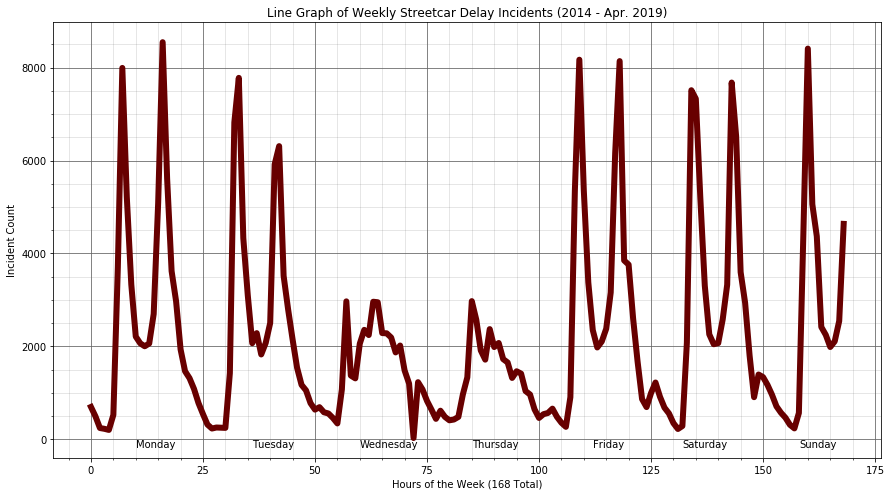

In [53]:
fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.plot(
    timeofday['Chronological'], 
    timeofday['Counts'], 
    color = '#680000', 
    lw = 6
)

ax.set_ylabel('Incident Count')
ax.set_xlabel('Hours of the Week (168 Total)')
ax.set_title('Line Graph of Weekly Streetcar Delay Incidents (2014 - Apr. 2019)')

plt.grid(which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.text(10, -175, 'Monday')
plt.text(36, -175, 'Tuesday')
plt.text(60, -175, 'Wednesday')
plt.text(85, -175, 'Thursday')
plt.text(112, -175, 'Friday')
plt.text(132, -175, 'Saturday')
plt.text(158, -175, 'Sunday')

plt.tight_layout()
plt.savefig(os.path.join(pathway, "Data_Analysis", 'Streetcar_Line_Graph_Weekly_Subway_Delay.jpg'))
plt.show()

# Subway, Bus and Streetcar Box Plots

In [54]:
# Read .csv files and store into Pandas data frame
subway = pd.read_csv(os.path.join(pathway_folder, 'subway_master.csv'))
surface = pd.read_csv(os.path.join(pathway_folder, 'surface_master.csv'))

In [55]:
subway.sample()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),holiday
31503,2015-07-10,12:26,Wednesday,SHEPPARD WEST STATION,PUSO,3,6,N,YU,5456,...,10,26.1,13.1,19.6,0.0,0.0,0.0,0.0,31.0,None


In [56]:
surface.sample()

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),Holiday
301875,2015-11-05,172,16.0,Tuesday,Cherry Street Route,General Delay,10.0,1.0,BW,NaN,...,5,20.0,8.8,14.2,0.3,0.0,0.3,0.0,31.0,None


In [57]:
# preview the subway dataframe first
# streetcar and bus will be done in sequence
# too many outliers need to remove any 0 minute delays (how can there be a delay if no time is presented) and
# remove any delays over 11 hours in length as instead of taking transit one can instead walk the 43 km
# (4 km/h is a comfortable walking speed) that toronto is in its largest dimension <https://en.wikipedia.org/wiki/Toronto>
subway_clean = subway.loc[(subway["Min Delay"] < 660) & (subway["Min Delay"] > 0)]
subway_clean.reset_index(drop=True, inplace=True)
subway_clean.head(2)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),holiday
0,2014-01-03,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34.0,None
1,2014-01-03,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,...,3,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34.0,None


In [58]:
# bus dataframe
bus = surface.loc[(surface["Type"] == "Bus") & (surface["Min Delay"] < 660) \
                         & (surface["Min Delay"] > 0)]
bus.reset_index(drop=True, inplace=True)
bus.head(2)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),Holiday
0,2019-01-03,39,0.22,Tuesday,NECR,Mechanical,9.0,18.0,W/B,1794.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None
1,2019-01-03,111,0.25,Tuesday,Eglington,Mechanical,15.0,30.0,S/B,8065.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None


In [59]:
# streetcar dataframe
streetcar = surface.loc[(surface["Type"] == "Streetcar") & (surface["Min Delay"] < 40) \
                               & (surface["Min Delay"] > 0)]
streetcar.reset_index(drop=True, inplace=True)
streetcar.head(2)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,...,nDay,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),Holiday
0,2019-01-03,301,1.13,Tuesday,Queen/Braodview,Held By,6.0,13.0,E/B,4193.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None
1,2019-01-03,511,1.50,Tuesday,Bathurst/College,Investigation,5.0,10.0,N/B,1038.0,...,3,1.3,-2.5,-0.6,0.0,0.0,0.0,2.8,44.0,None


In [60]:
# preview the subway, bus and streetcar columns
print(f'''
Subway
{subway_clean.columns}
Bus
{bus.columns}
Streetcar
{streetcar.columns}
''')


Subway
Index(['Date', 'Time', 'Day', 'Station', 'Code', 'Min Delay', 'Min Gap',
       'Bound', 'Line', 'Vehicle', 'Year', 'Description', 'Month', 'nDay',
       'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp', 'Total Rain (mm)',
       'Total Snow (cm)', 'Precipitation', 'Snow on Grnd (cm)',
       'Spd of Max Gust (km/h)', 'holiday'],
      dtype='object')
Bus
Index(['Date', 'Route', 'Time', 'Day', 'Location', 'Incident', 'Min Delay',
       'Min Gap', 'Direction', 'Vehicle', 'Year', 'Type', 'Month', 'nDay',
       'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp', 'Total Rain (mm)',
       'Total Snow (cm)', 'Precipitation', 'Snow on Grnd (cm)',
       'Spd of Max Gust (km/h)', 'Holiday'],
      dtype='object')
Streetcar
Index(['Date', 'Route', 'Time', 'Day', 'Location', 'Incident', 'Min Delay',
       'Min Gap', 'Direction', 'Vehicle', 'Year', 'Type', 'Month', 'nDay',
       'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp', 'Total Rain (mm)',
       'Total Snow (cm)', 'Precipitation', 'Sno

In [61]:
# preview the number of rows and columns
print(f'''
Subway
Number of rows: {subway_clean.shape[0]}
Number of columns: {subway_clean.shape[1]}
Bus
Number of rows: {bus.shape[0]}
Number of columns: {bus.shape[1]}
Streetcar
Number of rows: {streetcar.shape[0]}
Number of columns: {streetcar.shape[1]}
''')


Subway
Number of rows: 31993
Number of columns: 23
Bus
Number of rows: 399760
Number of columns: 23
Streetcar
Number of rows: 66461
Number of columns: 23



In [62]:
# the subway_clean["Time"] column is a object
# for later analysis a column called "Hour" is added which is a floating point number of the 24 hour clock
time = []
for value in subway_clean["Time"]:
    variable = value.split(":")
    hour = int(variable[0])
    minute = int(variable[1])
    time.append(round(hour + minute/60, 2))
subway_clean["Hour"] = time
subway_clean.head(2)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,...,Max Temp (°C),Min Temp (°C),Mean Temp,Total Rain (mm),Total Snow (cm),Precipitation,Snow on Grnd (cm),Spd of Max Gust (km/h),holiday,Hour
0,2014-01-03,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,...,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34.0,None,0.35
1,2014-01-03,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,...,-7.6,-23.6,-15.6,0.0,0.0,0.0,7.6,34.0,None,2.10


In [63]:
# According to <https://www.blogto.com/city/2014/04/when_exactly_is_rush_hour_in_toronto/> the TTC states that
# Morning Peak Time is between 6.30 am - 10 am
# Afternoon Peak Time is between 3.30 pm - 7 pm
# Day Time is betwen 10 am - 3:30 pm
# Off Hours are between 7 pm - 6:30 am
# Bin the time of day according to these 4 bins (5 bins but then rename one of the bins in this section)
bins = [0, 6.5, 10, 15.5, 19, 24]
group_names = ["Off Hours1", "Morning Peak Time", "Day Time", "Afternoon Peak Time", "Off Hours2"]
subway_clean["Hour Summary"] = pd.cut(subway_clean["Hour"], bins, labels=group_names)
bus["Hour Summary"] = pd.cut(bus["Time"], bins, labels=group_names)
streetcar["Hour Summary"] = pd.cut(streetcar["Time"], bins, labels=group_names)


# group the days of the week as Weekday or Weekend to observe if there are significant differences in minutes delayed
conditions1 = [
    (subway_clean["Day"] == "Monday") | (subway_clean["Day"] == "Tuesday") | (subway_clean["Day"] == "Wednesday") | \
    (subway_clean["Day"] == "Thursday") | (subway_clean["Day"] == "Friday"), 
    (subway_clean["Day"] == "Saturday") | (subway_clean["Day"] == "Sunday")]
conditions2 = [
    (bus["Day"] == "Monday") | (bus["Day"] == "Tuesday") | (bus["Day"] == "Wednesday") | \
    (bus["Day"] == "Thursday") | (bus["Day"] == "Friday"), 
    (bus["Day"] == "Saturday") | (bus["Day"] == "Sunday")]
conditions3 = [
    (streetcar["Day"] == "Monday") | (streetcar["Day"] == "Tuesday") | (streetcar["Day"] == "Wednesday") | \
    (streetcar["Day"] == "Thursday") | (streetcar["Day"] == "Friday"), 
    (streetcar["Day"] == "Saturday") | (streetcar["Day"] == "Sunday")]
choices = ["Weekday", "Weekend"]

# create new column indentifiying if it is Weekday or Weekend
subway_clean["Weekday"] = np.select(conditions1, choices, default=None)
bus["Weekday"] = np.select(conditions2, choices, default=None)
streetcar["Weekday"] = np.select(conditions3, choices, default=None)

# rename the 2 bins so they can become 1
subway_clean["Hour Summary"].replace("Off Hours1", "Off Hours", inplace=True)
subway_clean["Hour Summary"].replace("Off Hours2", "Off Hours", inplace=True)
bus["Hour Summary"].replace("Off Hours1", "Off Hours", inplace=True)
bus["Hour Summary"].replace("Off Hours2", "Off Hours", inplace=True)
streetcar["Hour Summary"].replace("Off Hours1", "Off Hours", inplace=True)
streetcar["Hour Summary"].replace("Off Hours2", "Off Hours", inplace=True)

In [64]:
# get values such as mean, median, sem, .25 quantile, 0.75 quantile and total count of incidences for 
# each dataframe
subway_clean_route = subway_clean.groupby(['Weekday', "Hour Summary"]).agg({'Min Delay': ['count', 'mean', "median", 'sum', 'sem'], 'Min Gap': ['mean', 'sum', 'sem']})
subway_clean_route_low = subway_clean.groupby(['Weekday', "Hour Summary"]).quantile(q=0.25)
subway_clean_route_high = subway_clean.groupby(['Weekday', "Hour Summary"]).quantile(q=0.75)
subway_clean_route_low = subway_clean_route_low.reset_index(level=['Weekday', 'Hour Summary'])

bus_route = bus.groupby(['Weekday', "Hour Summary"]).agg({'Min Delay': ['count', 'mean', "median", 'sum', 'sem'], 'Min Gap': ['mean', 'sum', 'sem']})
bus_route_low = bus.groupby(['Weekday', "Hour Summary"]).quantile(q=0.25)
bus_route_high = bus.groupby(['Weekday', "Hour Summary"]).quantile(q=0.75)
bus_route_low.drop(columns=["Route", "Time", "Min Gap", "Vehicle", "Year"], inplace=True)
bus_route_low = bus_route_low.reset_index(level=['Weekday', 'Hour Summary'])

streetcar_route = streetcar.groupby(['Weekday', "Hour Summary"]).agg({'Min Delay': ['count', 'mean', "median", 'sum', 'sem'], 'Min Gap': ['mean', 'sum', 'sem']})
streetcar_route_low = streetcar.groupby(['Weekday', "Hour Summary"]).quantile(q=0.25)
streetcar_route_high = streetcar.groupby(['Weekday', "Hour Summary"]).quantile(q=0.75)
streetcar_route_low.drop(columns=["Route", "Time", "Min Gap", "Vehicle", "Year"], inplace=True)
streetcar_route_low = streetcar_route_low.reset_index(level=['Weekday', 'Hour Summary'])

In [65]:
# generate dictionaries then form dataframes from them
weekday1 = subway_clean_route_low["Weekday"].tolist()
hour1 = subway_clean_route_low["Hour Summary"].tolist()
quart_1_1 = subway_clean_route_low["Min Delay"].tolist()
quart_3_1 = subway_clean_route_high["Min Delay"].tolist()
median1 = subway_clean_route["Min Delay"]["median"].tolist()
mean1 = round(subway_clean_route["Min Delay"]["mean"], 2).tolist()
error1 = round(subway_clean_route["Min Delay"]["sem"], 2).tolist()

sub_dict = {"Weekday": weekday1, 
        "Time of Day": hour1, 
        "Mean": mean1, 
        "Standard Error": error1, 
        "Median": median1, 
        "0.25 Quartile": quart_1_1, 
        "0.75 Quartile": quart_3_1}

weekday2 = bus_route_low["Weekday"].tolist()
hour2 = bus_route_low["Hour Summary"].tolist()
quart_1_2 = bus_route_low["Min Delay"].tolist()
quart_3_2 = bus_route_high["Min Delay"].tolist()
median2 = bus_route["Min Delay"]["median"].tolist()
mean2 = round(bus_route["Min Delay"]["mean"], 2).tolist()
error2 = round(bus_route["Min Delay"]["sem"], 2).tolist()

bus_dict = {"Weekday": weekday2, 
        "Time of Day": hour2, 
        "Mean": mean2, 
        "Standard Error": error2, 
        "Median": median2, 
        "0.25 Quartile": quart_1_2, 
        "0.75 Quartile": quart_3_2}

weekday3 = streetcar_route_low["Weekday"].tolist()
hour3 = streetcar_route_low["Hour Summary"].tolist()
quart_1_3 = streetcar_route_low["Min Delay"].tolist()
quart_3_3 = streetcar_route_high["Min Delay"].tolist()
median3 = streetcar_route["Min Delay"]["median"].tolist()
mean3 = round(streetcar_route["Min Delay"]["mean"], 2).tolist()
error3 = round(streetcar_route["Min Delay"]["sem"], 2).tolist()


street_dict = {"Weekday": weekday3, 
        "Time of Day": hour3, 
        "Mean": mean3, 
        "Standard Error": error3, 
        "Median": median3, 
        "0.25 Quartile": quart_1_3, 
        "0.75 Quartile": quart_3_3}

# generate dataframes
sub_combined = pd.DataFrame(sub_dict)
bus_combined = pd.DataFrame(bus_dict)
street_combined = pd.DataFrame(street_dict)

In [66]:
# need to reindex and reset index of dataframes as they are in the wrong order
sub_combined2 = sub_combined.reindex([2, 1, 0, 3, 6, 5, 4, 7])
sub_combined2.reset_index(inplace=True)
sub_combined2.drop(columns="index", inplace=True)

bus_combined2 = bus_combined.reindex([2, 1, 0, 3, 6, 5, 4, 7])
bus_combined2.reset_index(inplace=True)
bus_combined2.drop(columns="index", inplace=True)

street_combined2 = street_combined.reindex([2, 1, 0, 3, 6, 5, 4, 7])
street_combined2.reset_index(inplace=True)
street_combined2.drop(columns="index", inplace=True)

In [67]:
# show the statistics summary for each dataframe
# subway first
sub_combined2.to_csv(os.path.join(pathway, "Data_Analysis", 'Subway_Weekday_Peak_Time_Stats.csv'))
sub_combined2

,Weekday,Time of Day,Mean,Standard Error,Median,0.25 Quartile,0.75 Quartile
0,Weekday,Morning Peak Time,5.66,0.13,4,3.0,6.0
1,Weekday,Day Time,6.71,0.16,4,3.0,6.0
2,Weekday,Afternoon Peak Time,6.04,0.14,4,3.0,6.0
3,Weekday,Off Hours,7.26,0.15,5,3.0,7.0
4,Weekend,Morning Peak Time,7.49,0.46,5,4.0,6.0
5,Weekend,Day Time,7.26,0.41,4,3.0,6.0
6,Weekend,Afternoon Peak Time,7.54,0.50,5,4.0,7.0
7,Weekend,Off Hours,7.74,0.33,5,4.0,7.0


In [68]:
# bus next
bus_combined2.to_csv(os.path.join(pathway, "Data_Analysis", 'Bus_Weekday_Peak_Time_Stats.csv'))
bus_combined2

,Weekday,Time of Day,Mean,Standard Error,Median,0.25 Quartile,0.75 Quartile
0,Weekday,Morning Peak Time,9.77,0.02,9.0,5.0,13.0
1,Weekday,Day Time,11.14,0.02,10.0,7.0,15.0
2,Weekday,Afternoon Peak Time,11.07,0.02,10.0,7.0,15.0
3,Weekday,Off Hours,11.21,0.02,10.0,6.0,15.0
4,Weekend,Morning Peak Time,13.32,0.06,11.0,9.0,18.0
5,Weekend,Day Time,11.73,0.04,10.0,7.0,15.0
6,Weekend,Afternoon Peak Time,11.40,0.06,10.0,7.0,15.0
7,Weekend,Off Hours,14.09,0.06,11.0,10.0,20.0


In [69]:
# streetcar last
street_combined2.to_csv(os.path.join(pathway, "Data_Analysis", 'Streetcar_Weekday_Peak_Time_Stats.csv'))
street_combined2

,Weekday,Time of Day,Mean,Standard Error,Median,0.25 Quartile,0.75 Quartile
0,Weekday,Morning Peak Time,7.44,0.05,5.0,4.0,9.0
1,Weekday,Day Time,8.19,0.05,6.0,4.0,10.0
2,Weekday,Afternoon Peak Time,8.44,0.07,6.0,4.0,11.0
3,Weekday,Off Hours,8.17,0.04,6.0,5.0,10.0
4,Weekend,Morning Peak Time,8.55,0.11,7.0,5.0,10.0
5,Weekend,Day Time,8.32,0.08,6.0,5.0,10.0
6,Weekend,Afternoon Peak Time,8.34,0.12,6.0,5.0,10.0
7,Weekend,Off Hours,10.80,0.10,9.0,7.0,13.0


In [70]:
# found this code to print pretty tables <https://stackoverflow.com/questions/19726663/how-to-save-the-pandas-dataframe-series-data-as-a-figure/33048932>
# from pandas dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six


output = os.path.join(".", "Output")
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        #size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        size = (25, 5)
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(sub_combined2, header_columns=0, col_width=2.0)
subway_stat = os.path.join(pathway, "Data_Analysis", "Subway_statistics.jpg")
plt.savefig(subway_stat)
plt.close()

render_mpl_table(bus_combined2, header_columns=0, col_width=2.0)
bus_stat = os.path.join(pathway, "Data_Analysis", "Bus_statistics.jpg")
plt.savefig(bus_stat)
plt.close()

render_mpl_table(street_combined2, header_columns=0, col_width=2.0)
streetcar_stat = os.path.join(pathway, "Data_Analysis", "Streetcar_statistics.jpg")
plt.savefig(streetcar_stat)
plt.close("all")

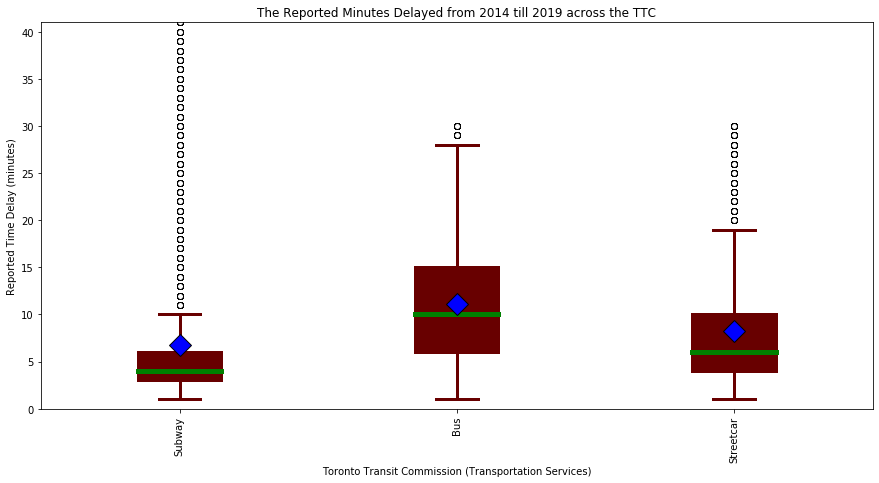

In [71]:
# now time to plot the 3 boxplots of the subway, bus and streetcar minutes delayed for comparison
data1 = subway_clean["Min Delay"].values
data2 = bus["Min Delay"].values
data3 = streetcar["Min Delay"].values
data = [data1, data2, data3]

labels = ["Subway", "Bus", "Streetcar"]

fig = plt.figure(1, figsize = [12.5, 7])

c1 = "#680000"
c2 = "green"
c3 = "blue"

ax = fig.add_subplot(111)
ax.set_title('The Reported Minutes Delayed from 2014 till 2019 across the TTC')

bp = ax.boxplot(data, showmeans=True, showfliers=True, labels=labels, \
          patch_artist=True, boxprops=dict(facecolor=c1, color=c1, linewidth=3), \
          capprops=dict(color=c1, linewidth=3), whiskerprops=dict(color=c1, linewidth=3), \
          flierprops=dict(color=c1, markeredgecolor="black", markerfacecolor="white"), \
            medianprops=dict(color=c2, linewidth=5), meanprops=dict(marker="D", \
            markeredgecolor="black", markerfacecolor=c3, markersize=15))

ax.set_ylim(0, 41)

ax.set_xlabel("Toronto Transit Commission (Transportation Services)")
ax.set_ylabel("Reported Time Delay (minutes)")

plt.xticks(rotation="vertical")

plt.rcParams.update({'font.size': 16})

plt.tight_layout()

TTC_min = os.path.join(pathway, "Data_Analysis", "minute_delay_TTC.jpg")
plt.savefig(TTC_min)

plt.show()

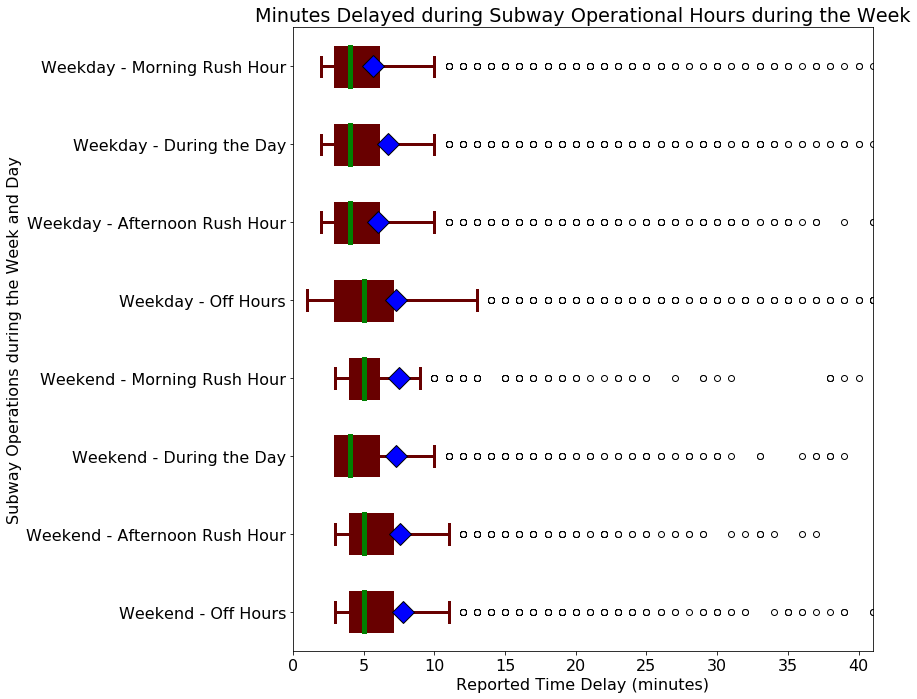

In [72]:
plt.close()

# generate the dataframes needed for the plot
subway_clean_off_day = subway_clean.loc[(subway_clean["Weekday"] == "Weekday") & (subway_clean["Hour Summary"] == "Off Hours")]
subway_clean_off_day.reset_index(drop=True, inplace=True)
subway_clean_morn_day = subway_clean.loc[(subway_clean["Weekday"] == "Weekday") & (subway_clean["Hour Summary"] == "Morning Peak Time")]
subway_clean_morn_day.reset_index(drop=True, inplace=True)
subway_clean_after_day = subway_clean.loc[(subway_clean["Weekday"] == "Weekday") & (subway_clean["Hour Summary"] == "Afternoon Peak Time")]
subway_clean_after_day.reset_index(drop=True, inplace=True)
subway_clean_day_day = subway_clean.loc[(subway_clean["Weekday"] == "Weekday") & (subway_clean["Hour Summary"] == "Day Time")]
subway_clean_day_day.reset_index(drop=True, inplace=True)
subway_clean_off_end = subway_clean.loc[(subway_clean["Weekday"] == "Weekend") & (subway_clean["Hour Summary"] == "Off Hours")]
subway_clean_off_end.reset_index(drop=True, inplace=True)
subway_clean_morn_end = subway_clean.loc[(subway_clean["Weekday"] == "Weekend") & (subway_clean["Hour Summary"] == "Morning Peak Time")]
subway_clean_morn_end.reset_index(drop=True, inplace=True)
subway_clean_after_end = subway_clean.loc[(subway_clean["Weekday"] == "Weekend") & (subway_clean["Hour Summary"] == "Afternoon Peak Time")]
subway_clean_after_end.reset_index(drop=True, inplace=True)
subway_clean_day_end = subway_clean.loc[(subway_clean["Weekday"] == "Weekend") & (subway_clean["Hour Summary"] == "Day Time")]
subway_clean_day_end.reset_index(drop=True, inplace=True)

# now plot 
data8 = subway_clean_morn_day["Min Delay"].values
data7 = subway_clean_day_day["Min Delay"].values
data6 = subway_clean_after_day["Min Delay"].values
data5 = subway_clean_off_day["Min Delay"].values
data4 = subway_clean_morn_end["Min Delay"].values
data3 = subway_clean_day_end["Min Delay"].values
data2 = subway_clean_after_end["Min Delay"].values
data1 = subway_clean_off_end["Min Delay"].values

data = [data1, data2, data3, data4, data5, data6, data7, data8]
labels = ["Weekend - Off Hours", "Weekend - Afternoon Rush Hour", "Weekend - During the Day", \
         "Weekend - Morning Rush Hour", "Weekday - Off Hours", "Weekday - Afternoon Rush Hour", \
         "Weekday - During the Day", "Weekday - Morning Rush Hour"]

fig = plt.figure(1, figsize = [12.5, 10])

c1 = "#680000"
c2 = "green"
c3 = "blue"

ax = fig.add_subplot(111)
ax.set_title('Minutes Delayed during Subway Operational Hours during the Week')

bp = ax.boxplot(data, vert=False, showmeans=True, showfliers=True, labels=labels, \
          patch_artist=True, boxprops=dict(facecolor=c1, color=c1, linewidth=3), \
          capprops=dict(color=c1, linewidth=3), whiskerprops=dict(color=c1, linewidth=3), \
          flierprops=dict(color=c1, markeredgecolor="black", markerfacecolor="white"), \
            medianprops=dict(color=c2, linewidth=5), meanprops=dict(marker="D", \
            markeredgecolor="black", markerfacecolor=c3, markersize=15))

ax.set_xlim(0, 41)

ax.set_xlabel("Reported Time Delay (minutes)")
ax.set_ylabel("Subway Operations during the Week and Day")

plt.rcParams.update({'font.size': 16})

plt.tight_layout()

subway_min = os.path.join(pathway, "Data_Analysis", "subway_min_delay.jpg")
plt.savefig(subway_min)

plt.show()

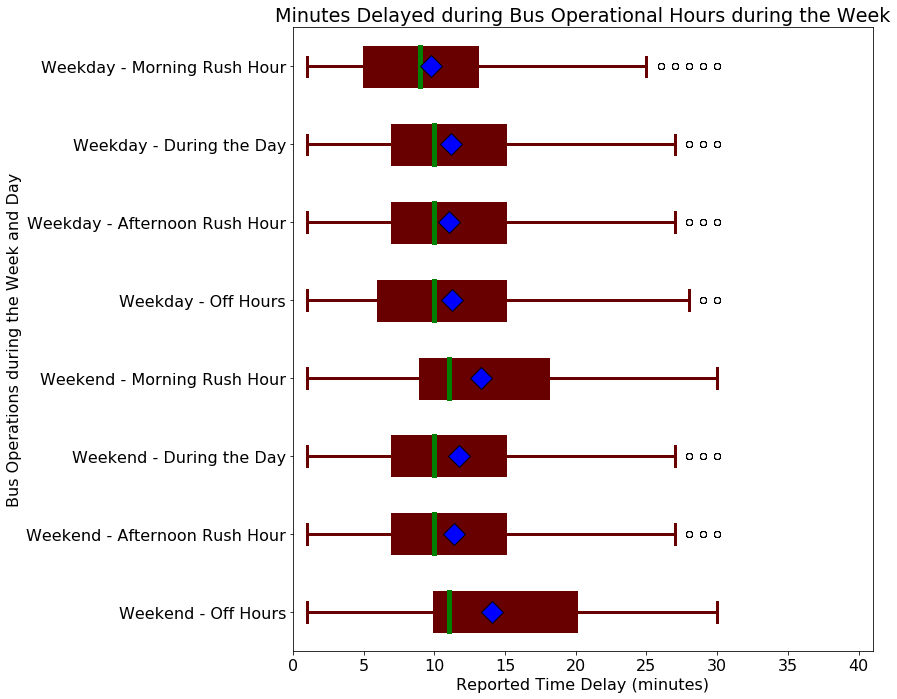

In [73]:
plt.close()

# generate the dataframes for the plot
bus_off_day = bus.loc[(bus["Weekday"] == "Weekday") & (bus["Hour Summary"] == "Off Hours")]
bus_off_day.reset_index(drop=True, inplace=True)
bus_morn_day = bus.loc[(bus["Weekday"] == "Weekday") & (bus["Hour Summary"] == "Morning Peak Time")]
bus_morn_day.reset_index(drop=True, inplace=True)
bus_after_day = bus.loc[(bus["Weekday"] == "Weekday") & (bus["Hour Summary"] == "Afternoon Peak Time")]
bus_after_day.reset_index(drop=True, inplace=True)
bus_day_day = bus.loc[(bus["Weekday"] == "Weekday") & (bus["Hour Summary"] == "Day Time")]
bus_day_day.reset_index(drop=True, inplace=True)
bus_off_end = bus.loc[(bus["Weekday"] == "Weekend") & (bus["Hour Summary"] == "Off Hours")]
bus_off_end.reset_index(drop=True, inplace=True)
bus_morn_end = bus.loc[(bus["Weekday"] == "Weekend") & (bus["Hour Summary"] == "Morning Peak Time")]
bus_morn_end.reset_index(drop=True, inplace=True)
bus_after_end = bus.loc[(bus["Weekday"] == "Weekend") & (bus["Hour Summary"] == "Afternoon Peak Time")]
bus_after_end.reset_index(drop=True, inplace=True)
bus_day_end = bus.loc[(bus["Weekday"] == "Weekend") & (bus["Hour Summary"] == "Day Time")]
bus_day_end.reset_index(drop=True, inplace=True)

# now plot
data8 = bus_morn_day["Min Delay"].values
data7 = bus_day_day["Min Delay"].values
data6 = bus_after_day["Min Delay"].values
data5 = bus_off_day["Min Delay"].values
data4 = bus_morn_end["Min Delay"].values
data3 = bus_day_end["Min Delay"].values
data2 = bus_after_end["Min Delay"].values
data1 = bus_off_end["Min Delay"].values

data = [data1, data2, data3, data4, data5, data6, data7, data8]
labels = ["Weekend - Off Hours", "Weekend - Afternoon Rush Hour", "Weekend - During the Day", \
         "Weekend - Morning Rush Hour", "Weekday - Off Hours", "Weekday - Afternoon Rush Hour", \
         "Weekday - During the Day", "Weekday - Morning Rush Hour"]

fig = plt.figure(1, figsize = [12.5, 10])

c1 = "#680000"
c2 = "green"
c3 = "blue"

ax = fig.add_subplot(111)
ax.set_title('Minutes Delayed during Bus Operational Hours during the Week')

bp = ax.boxplot(data, vert=False, showmeans=True, showfliers=True, labels=labels, \
          patch_artist=True, boxprops=dict(facecolor=c1, color=c1, linewidth=3), \
          capprops=dict(color=c1, linewidth=3), whiskerprops=dict(color=c1, linewidth=3), \
          flierprops=dict(color=c1, markeredgecolor="black", markerfacecolor="white"), \
            medianprops=dict(color=c2, linewidth=5), meanprops=dict(marker="D", \
            markeredgecolor="black", markerfacecolor=c3, markersize=15))

ax.set_xlim(0, 41)

ax.set_xlabel("Reported Time Delay (minutes)")
ax.set_ylabel("Bus Operations during the Week and Day")

plt.rcParams.update({'font.size': 16})

plt.tight_layout()

bus_min = os.path.join(pathway, "Data_Analysis", "bus_min_delay.jpg")
plt.savefig(bus_min)

plt.show()

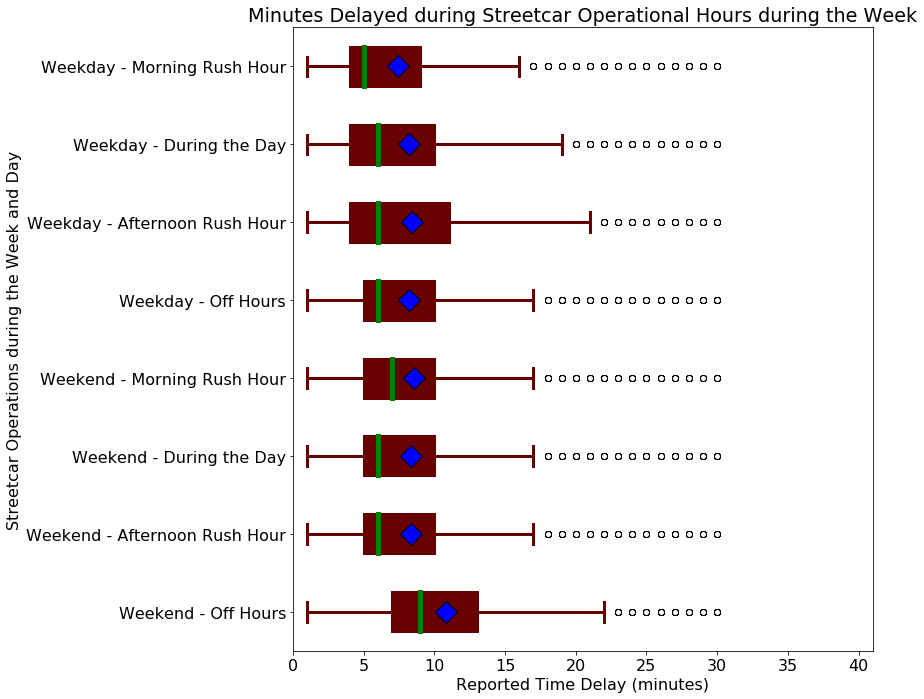

In [74]:
plt.close()

# generate dataframes for plots
streetcar_off_day = streetcar.loc[(streetcar["Weekday"] == "Weekday") & (streetcar["Hour Summary"] == "Off Hours")]
streetcar_off_day.reset_index(drop=True, inplace=True)
streetcar_morn_day = streetcar.loc[(streetcar["Weekday"] == "Weekday") & (streetcar["Hour Summary"] == "Morning Peak Time")]
streetcar_morn_day.reset_index(drop=True, inplace=True)
streetcar_after_day = streetcar.loc[(streetcar["Weekday"] == "Weekday") & (streetcar["Hour Summary"] == "Afternoon Peak Time")]
streetcar_after_day.reset_index(drop=True, inplace=True)
streetcar_day_day = streetcar.loc[(streetcar["Weekday"] == "Weekday") & (streetcar["Hour Summary"] == "Day Time")]
streetcar_day_day.reset_index(drop=True, inplace=True)
streetcar_off_end = streetcar.loc[(streetcar["Weekday"] == "Weekend") & (streetcar["Hour Summary"] == "Off Hours")]
streetcar_off_end.reset_index(drop=True, inplace=True)
streetcar_morn_end = streetcar.loc[(streetcar["Weekday"] == "Weekend") & (streetcar["Hour Summary"] == "Morning Peak Time")]
streetcar_morn_end.reset_index(drop=True, inplace=True)
streetcar_after_end = streetcar.loc[(streetcar["Weekday"] == "Weekend") & (streetcar["Hour Summary"] == "Afternoon Peak Time")]
streetcar_after_end.reset_index(drop=True, inplace=True)
streetcar_day_end = streetcar.loc[(streetcar["Weekday"] == "Weekend") & (streetcar["Hour Summary"] == "Day Time")]
streetcar_day_end.reset_index(drop=True, inplace=True)

# now plot it
data8 = streetcar_morn_day["Min Delay"].values
data7 = streetcar_day_day["Min Delay"].values
data6 = streetcar_after_day["Min Delay"].values
data5 = streetcar_off_day["Min Delay"].values
data4 = streetcar_morn_end["Min Delay"].values
data3 = streetcar_day_end["Min Delay"].values
data2 = streetcar_after_end["Min Delay"].values
data1 = streetcar_off_end["Min Delay"].values

data = [data1, data2, data3, data4, data5, data6, data7, data8]
labels = ["Weekend - Off Hours", "Weekend - Afternoon Rush Hour", "Weekend - During the Day", \
         "Weekend - Morning Rush Hour", "Weekday - Off Hours", "Weekday - Afternoon Rush Hour", \
         "Weekday - During the Day", "Weekday - Morning Rush Hour"]

fig = plt.figure(1, figsize = [12.5, 10])

c1 = "#680000"
c2 = "green"
c3 = "blue"

ax = fig.add_subplot(111)
ax.set_title('Minutes Delayed during Streetcar Operational Hours during the Week')

bp = ax.boxplot(data, vert=False, showmeans=True, showfliers=True, labels=labels, \
          patch_artist=True, boxprops=dict(facecolor=c1, color=c1, linewidth=3), \
          capprops=dict(color=c1, linewidth=3), whiskerprops=dict(color=c1, linewidth=3), \
          flierprops=dict(color=c1, markeredgecolor="black", markerfacecolor="white"), \
            medianprops=dict(color=c2, linewidth=5), meanprops=dict(marker="D", \
            markeredgecolor="black", markerfacecolor=c3, markersize=15))

ax.set_xlim(0, 41)

ax.set_xlabel("Reported Time Delay (minutes)")
ax.set_ylabel("Streetcar Operations during the Week and Day")

plt.rcParams.update({'font.size': 16})

plt.tight_layout()

streetcar_min = os.path.join(pathway, "Data_Analysis", "streetcar_min_delay.jpg")
plt.savefig(streetcar_min)

plt.show()